In [203]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel_masked as rk
from scipy.integrate import quad
import timeit

%pylab notebook
import time
from scipy.special import lpmn as lpmn



Populating the interactive namespace from numpy and matplotlib


In [516]:
nside=32 ; ell=arange(3*nside+1) ; npix=h.nside2npix(nside) ; print npix
beta0=min(180,180*24./(3.*nside)) ; xsize=400 ; reso=1.5*beta0*60./xsize ; print beta0
betafull=beta0
y=rk.real_space_queb_kernels(nside,tmax=betafull,maxlmax=3*nside,sampling=2500)

12288
45.0


In [518]:
lmin=2 ; lmax=3*nside
fl=ones(3*nside+1,float)
fl[:lmin]=0 ; fl[lmax+1:]=0

y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmin,lmin)
y.setup_fn_rad_ker()

In [474]:
cvalrq=zeros(npix,float) ; cvaliq=zeros(npix,float)
cvalru=zeros(npix,float) ; cvaliu=zeros(npix,float)
for i in arange(npix):
    tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][i]=1.
    alm=h.map2alm(tqu,lmax=lmax,pol=True)
    tebq=h.alm2map(alm,upnside,pol=False,verbose=False)
    cvalrq[i]=tebq[1][i]
    cvaliq[i]=tebq[2][i]    
    
    tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[2][i]=1.
    alm=h.map2alm(tqu,lmax=lmax,pol=True)
    tebu=h.alm2map(alm,upnside,pol=False,verbose=False)
    cvalru[i]=tebu[1][i+1]
    cvaliu[i]=tebu[2][i+1]    
    
theta,phi=h.pix2ang(nside,arange(npix))

IndexError: index 768 is out of bounds for axis 0 with size 768

<IPython.core.display.Javascript object>


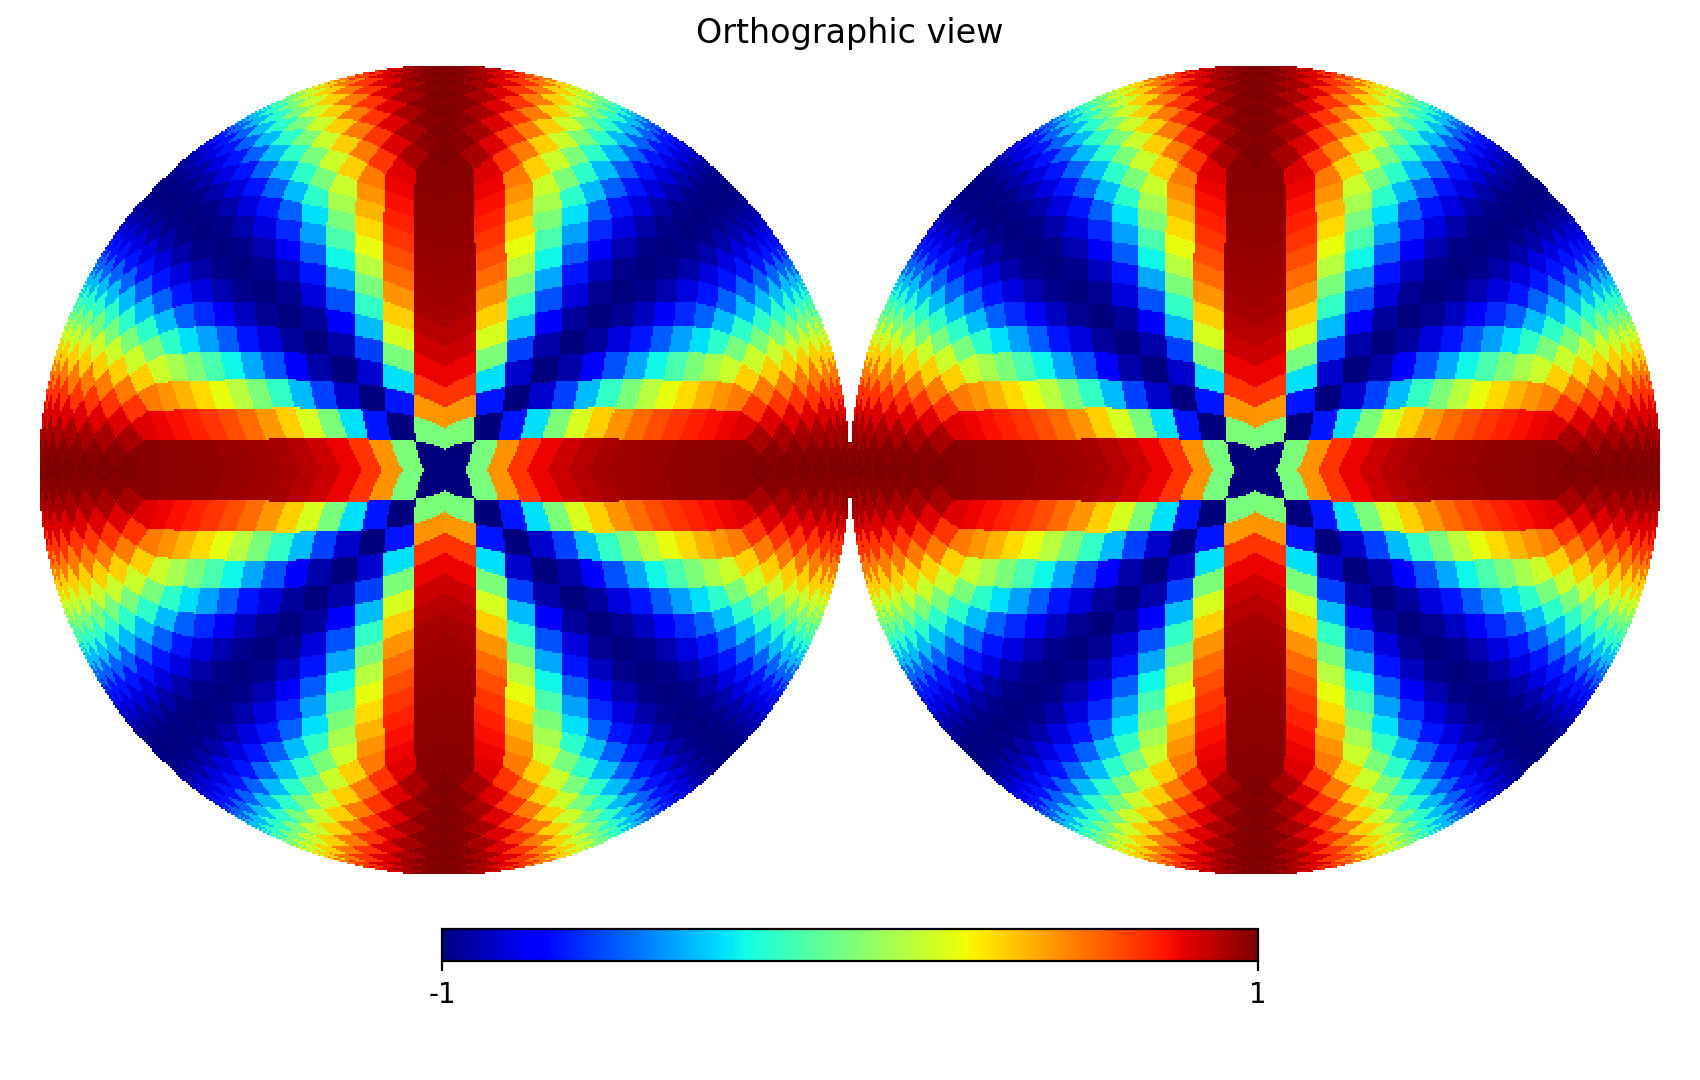

<IPython.core.display.Javascript object>


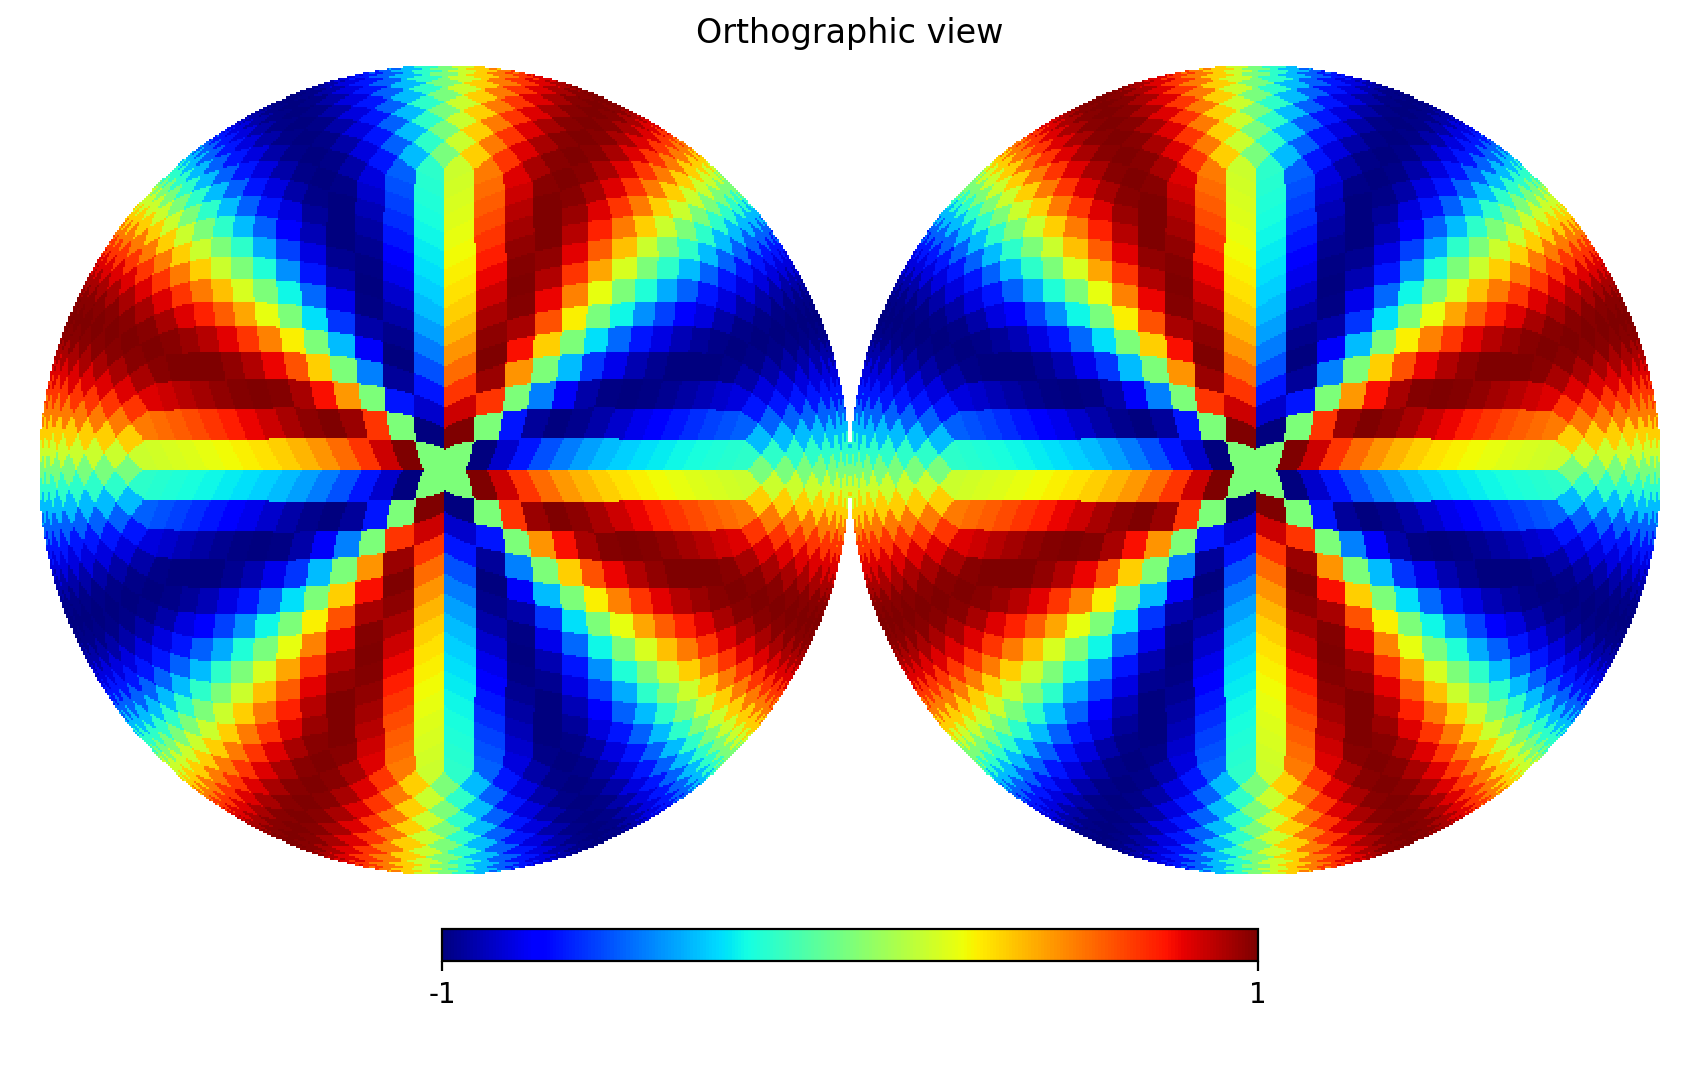

In [477]:
h.orthview(cos(4.*phi),rot=(0,90))
h.orthview(sin(4.*phi),rot=(0,90))




In [476]:
print cvalrq.size
phi.size

768


3072

<IPython.core.display.Javascript object>


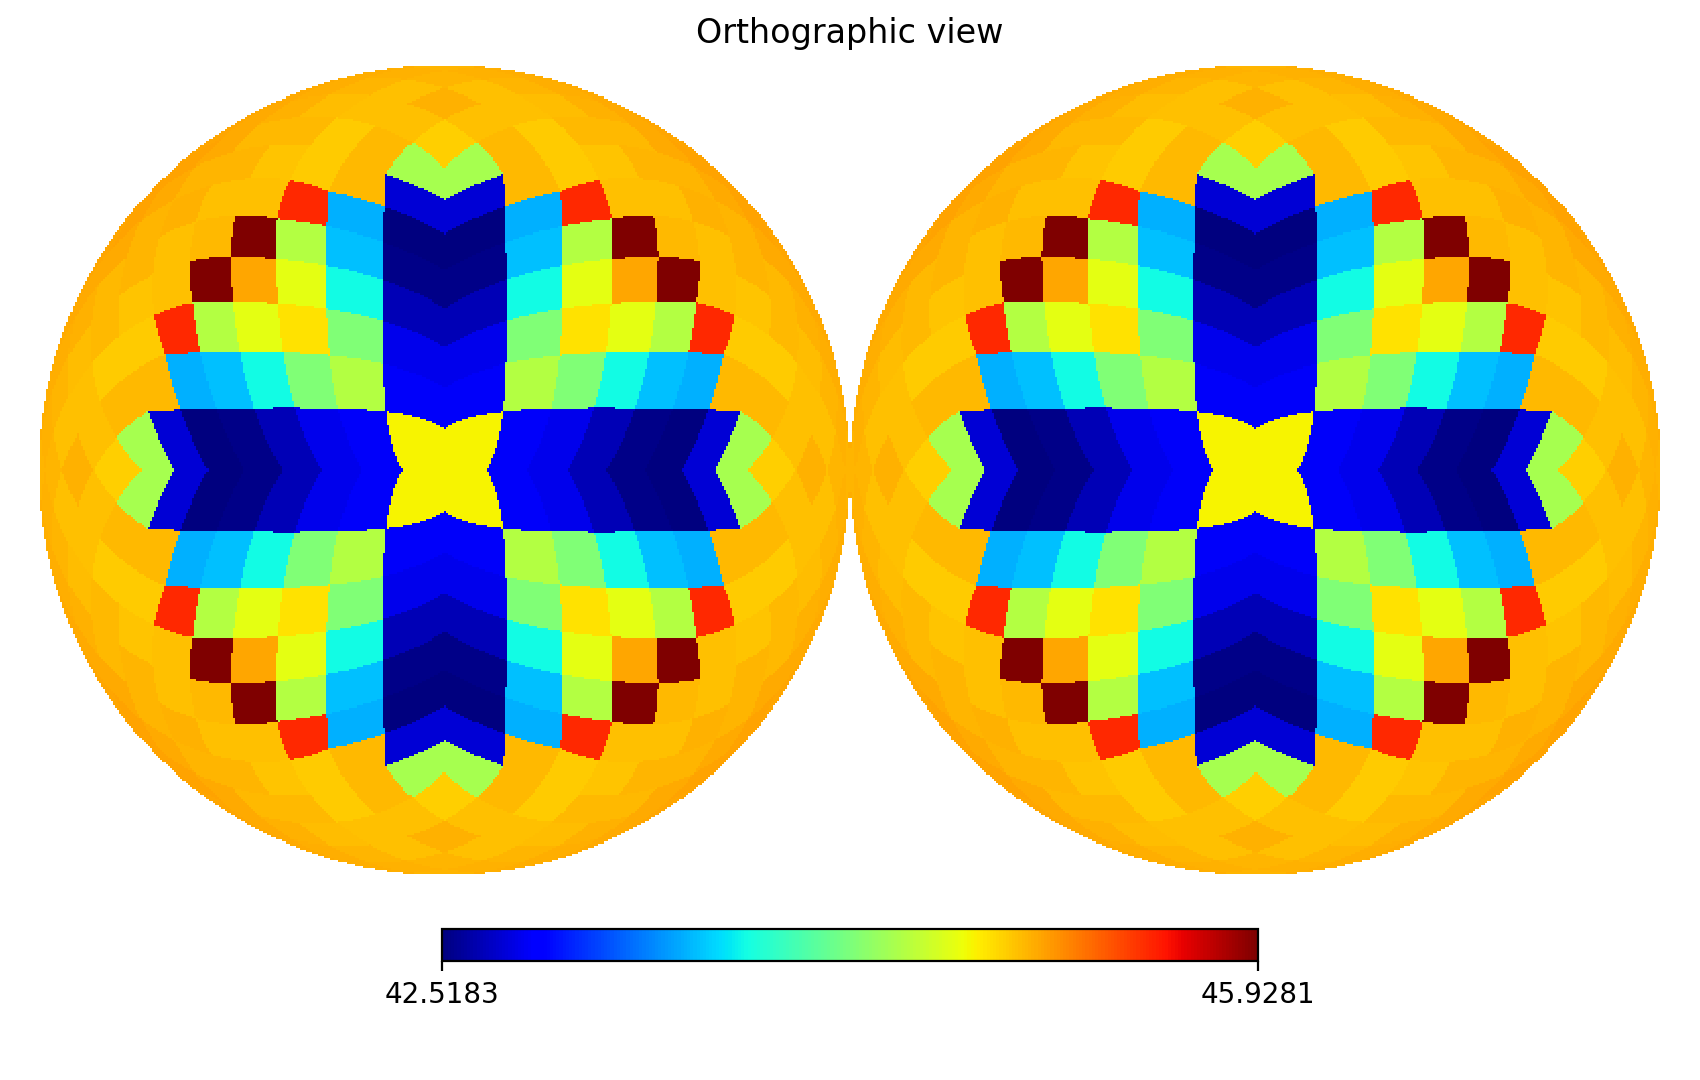

<IPython.core.display.Javascript object>


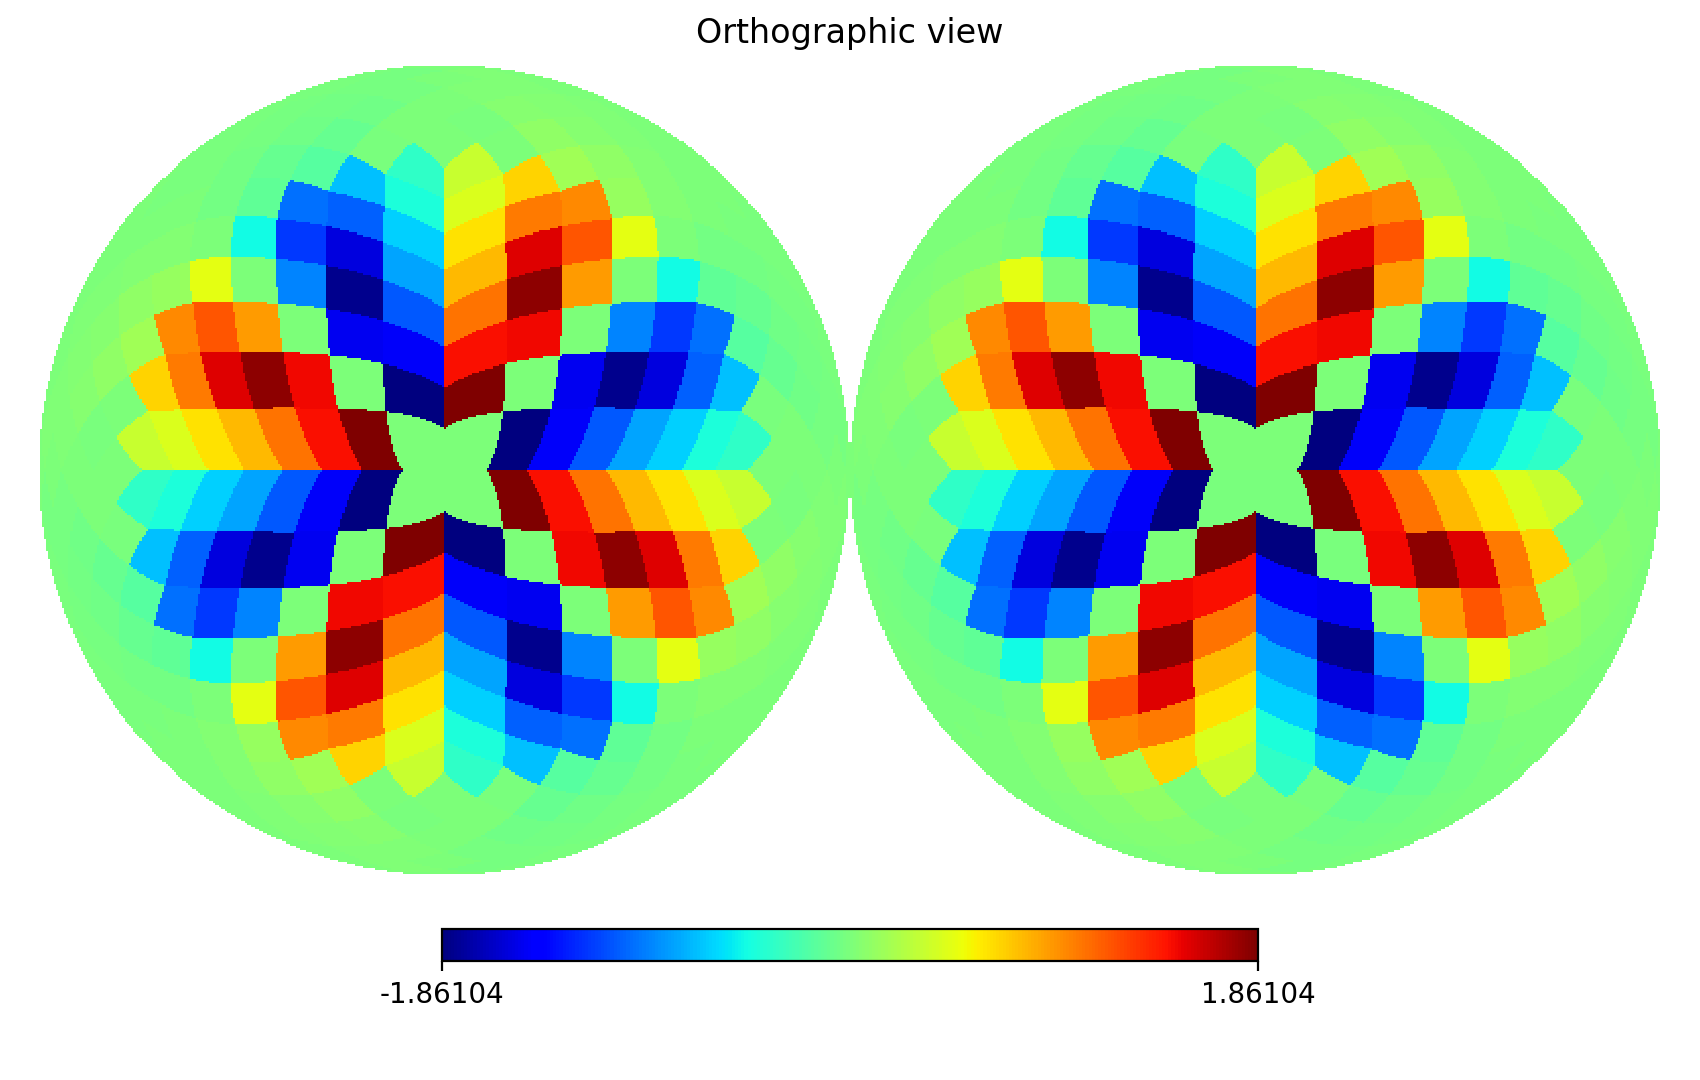

In [480]:
h.orthview(arccos(cvalrq)*180./pi/2.,rot=(0,90))
h.orthview(arcsin(cvaliq)*180./pi/2.,rot=(0,90))

<IPython.core.display.Javascript object>


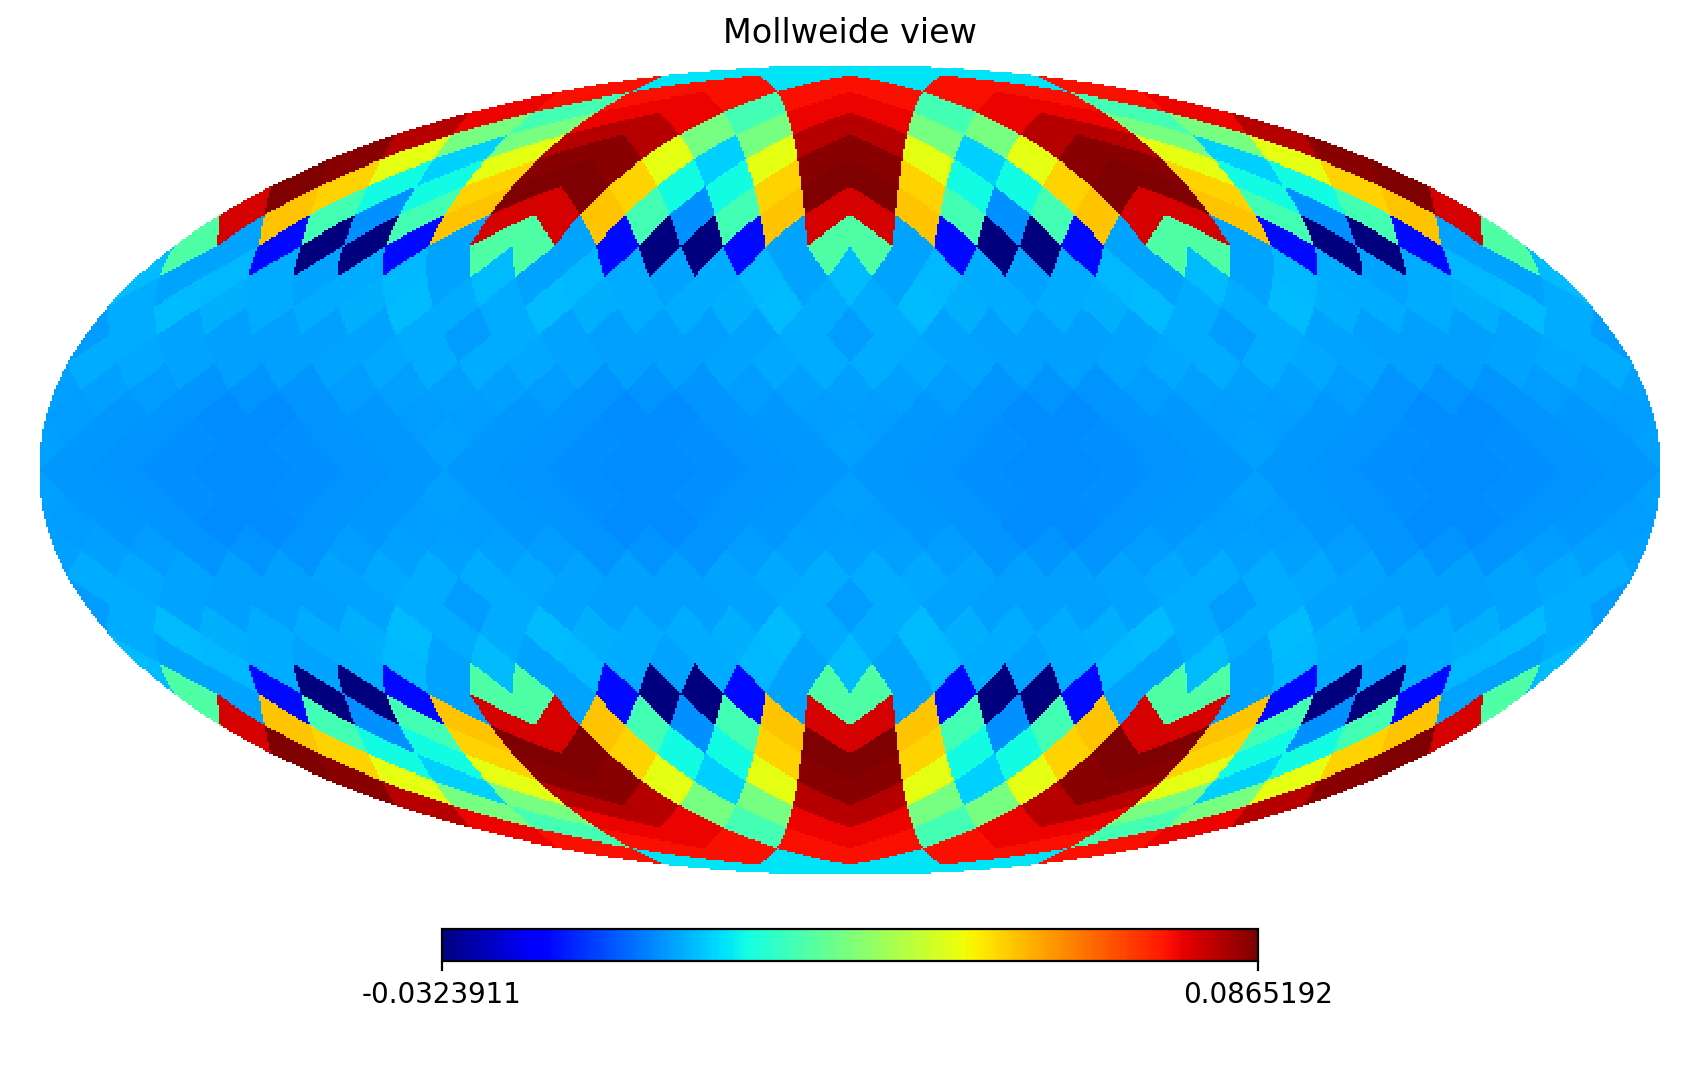

<IPython.core.display.Javascript object>


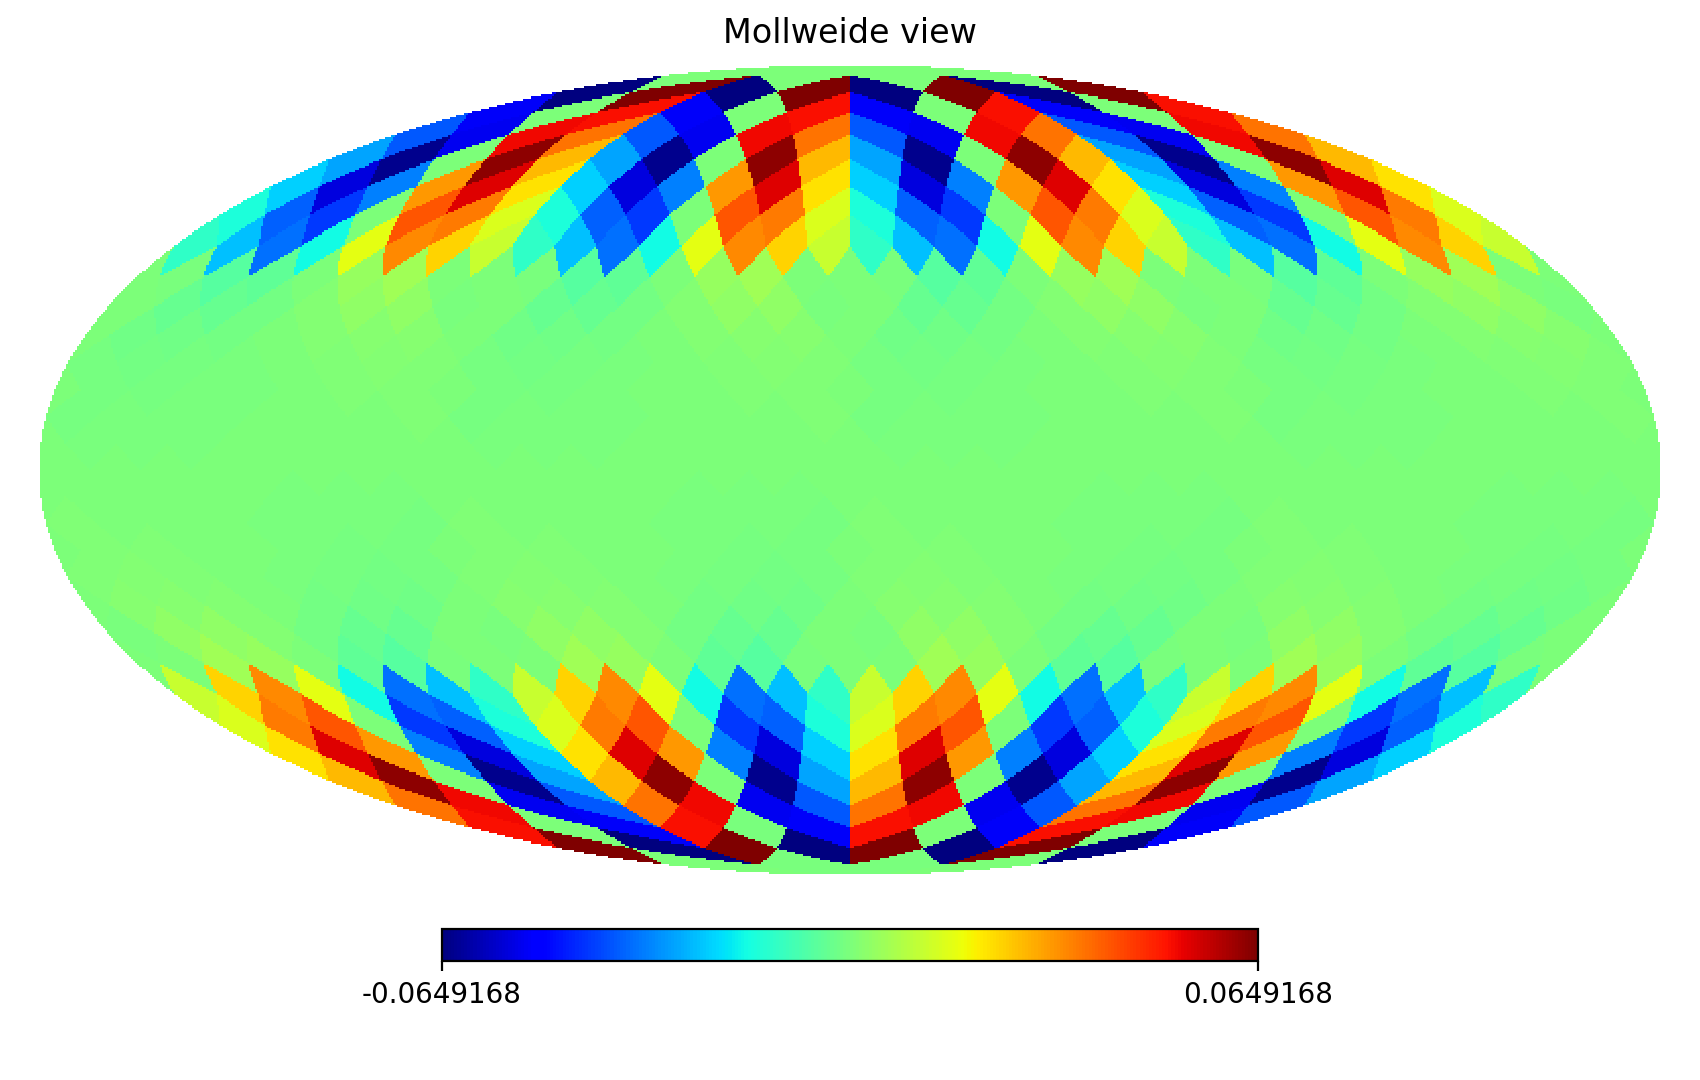

In [482]:
h.mollview(cvalrq,rot=(0,0))
h.mollview(cvaliq,rot=(0,0))

In [398]:
theta0=5. ; phi0=70.
cpix=h.ang2pix(upnside,theta0*pi/180.,phi0*pi/180.) ; print cpix
theta,phi=h.pix2ang(upnside,cpix)
theta=theta*180./pi ; phi=phi*180/pi ; print theta,phi

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
rtquq=h.alm2map(alm,upnside,pol=True,verbose=False)
tebq=h.alm2map(alm,upnside,pol=False,verbose=False)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[2][:]=0. ; equq=h.alm2map(alm,upnside,pol=True,verbose=False)
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
alm[1][:]=0. ; bquq=h.alm2map(alm,upnside,pol=True,verbose=False)

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[2][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) ; alm=[h.almxfl(alm[i],fl,inplace=True) for i in arange(3)]
rtquu=h.alm2map(alm,upnside,pol=True,verbose=False)
tebu=h.alm2map(alm,upnside,pol=False,verbose=False)

print tebq[1][cpix],tebq[1][cpix+1],arccos(tebq[1][cpix])*180./pi/2
print tebq[2][cpix],tebq[2][cpix+1],arcsin(tebq[2][cpix])*180./pi/2
print tebu[1][cpix],tebu[1][cpix+1],arcsin(tebu[1][cpix])*180./pi/2
print tebu[2][cpix],tebu[2][cpix+1],arccos(tebu[2][cpix])*180./pi/2

5
5.8502670637 67.5
0.0655195470239 0.182509264642 43.121657707
-0.0588635735232 -0.185819950395 -1.68729251227
0.0588635735232 0.185819950395 1.68729251227
0.0655195470239 0.182509264642 43.121657707


In [399]:
mr=zeros(npix,float) ; mi=zeros(npix,float)
mrp=zeros(npix,float) ; mip=zeros(npix,float)

norm=(nside**2.)/(upnside**2.) #; print norm
t1=time.time()
a,b,g,pix2=y.return_euler_angles(upnside,cpix,betafull)
ap,bp,gp,pix2p=y.return_euler_angles_new(upnside,cpix,betafull)


print time.time()-t1
#mr[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
mr[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
mrp[pix2]=cos(2.*(a-g))*y.fn_rad_ker(b)*norm ; mip[pix2]=sin(2.*(a-g))*y.fn_rad_ker(b)*norm


#mr[pix2]=cos(2.*a) ; mi[pix2]=sin(2.*a)


t1=time.time()
b,s2a,c2a,cb,pix2=y.return_trig2alpha(upnside,cpix,betafull)
print time.time()-t1
mrp[pix2]=c2a*y.fn_rad_ker(b)*norm ; mip[pix2]=s2a*y.fn_rad_ker(b)*norm
#mrp[pix2]=c2a ; mip[pix2]=s2a

0.00263595581055
0.000675201416016


In [540]:
upnside=256 ; npix=h.nside2npix(upnside)
#mr=zeros(npix,float) ; mi=zeros(npix,float) ; tebq=[zeros(npix,float),zeros(npix,float)]
t1=time.time()
theta=30*pi/180.;  phi=240*pi/180.

cpix=h.ang2pix(upnside,theta,phi) ; print cpix

norm=(nside**2.)/(upnside**2.)


tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
alm=h.map2alm(tqu,lmax=lmax,pol=True) 
tebq[0]=tebq[0] + h.alm2map(alm[1],upnside,verbose=False)
tebq[1]=tebq[1] + h.alm2map(alm[1],upnside,verbose=False)

a,b,g,pix2=y.return_euler_angles(upnside,cpix,betafull)
print time.time()-t1
mr[pix2]=mr[pix2] + cos(2.*a)*y.fn_rad_ker(b)*norm ; mi[pix2]= mi[pix2] + sin(2.*a)*y.fn_rad_ker(b)*norm

53246
0.589462041855


In [541]:
print max(-tebq[0])/max(mr),norm

0.999999966307 0.015625


<IPython.core.display.Javascript object>


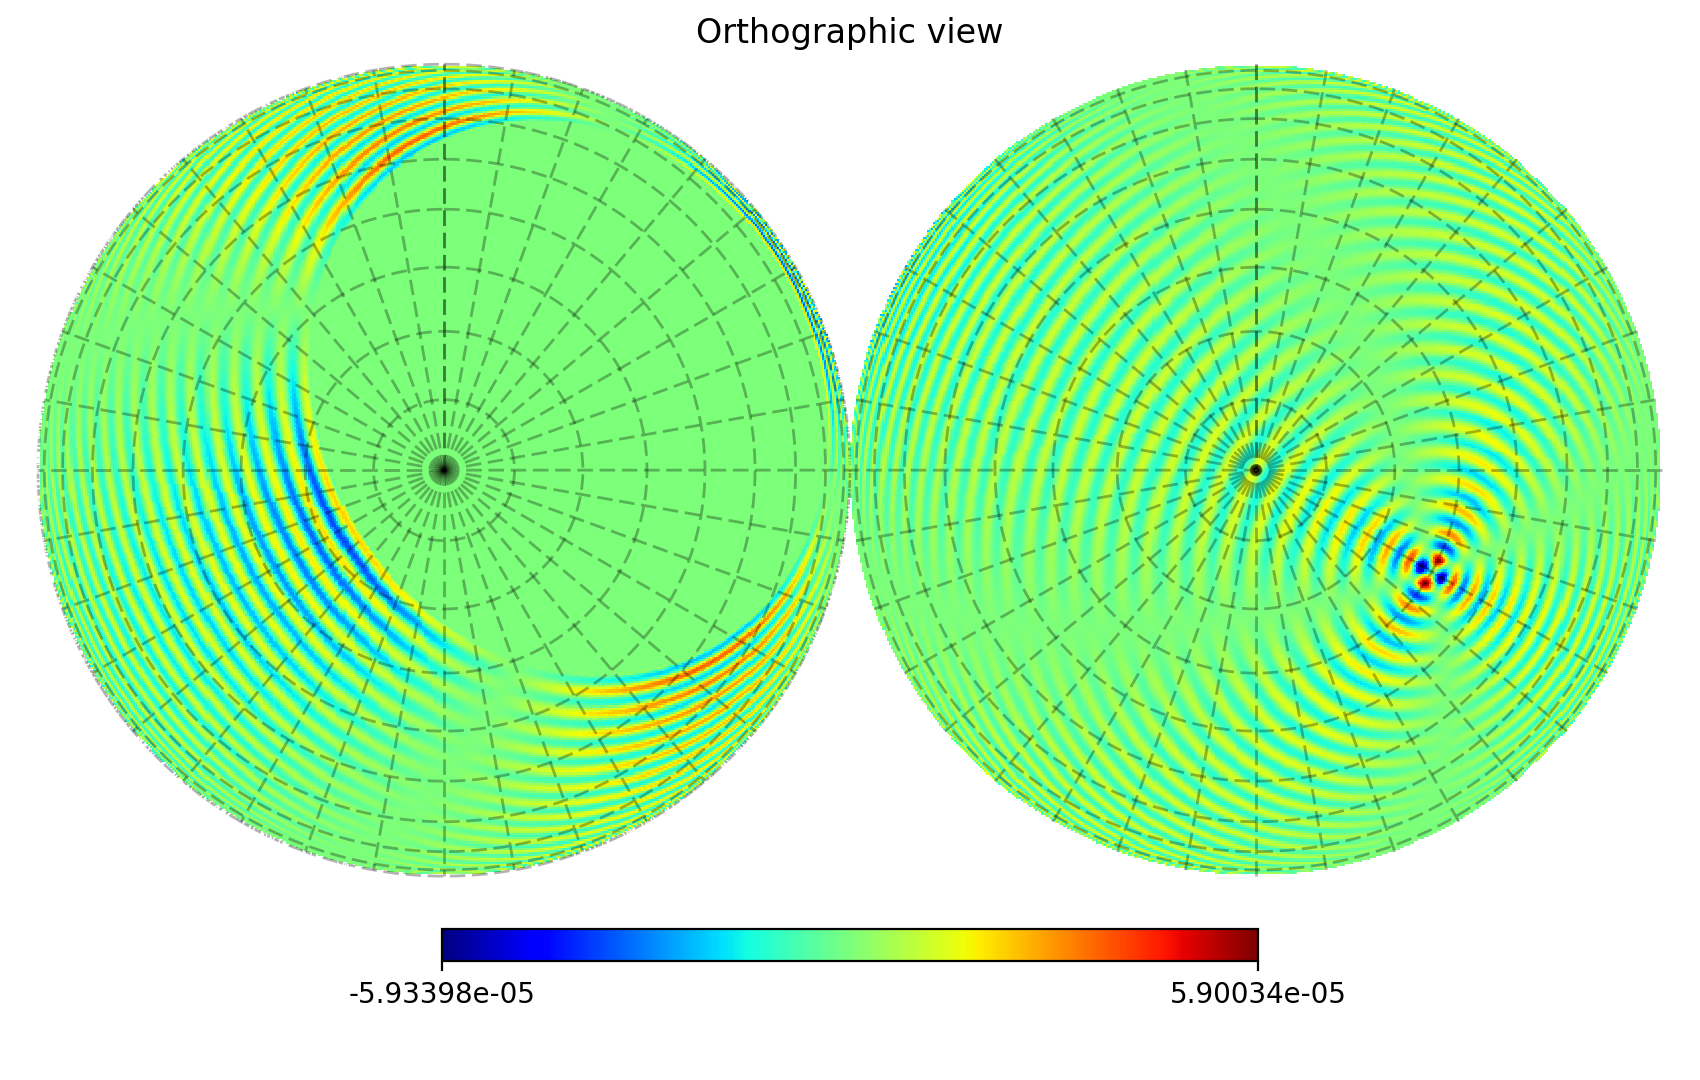

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


<IPython.core.display.Javascript object>


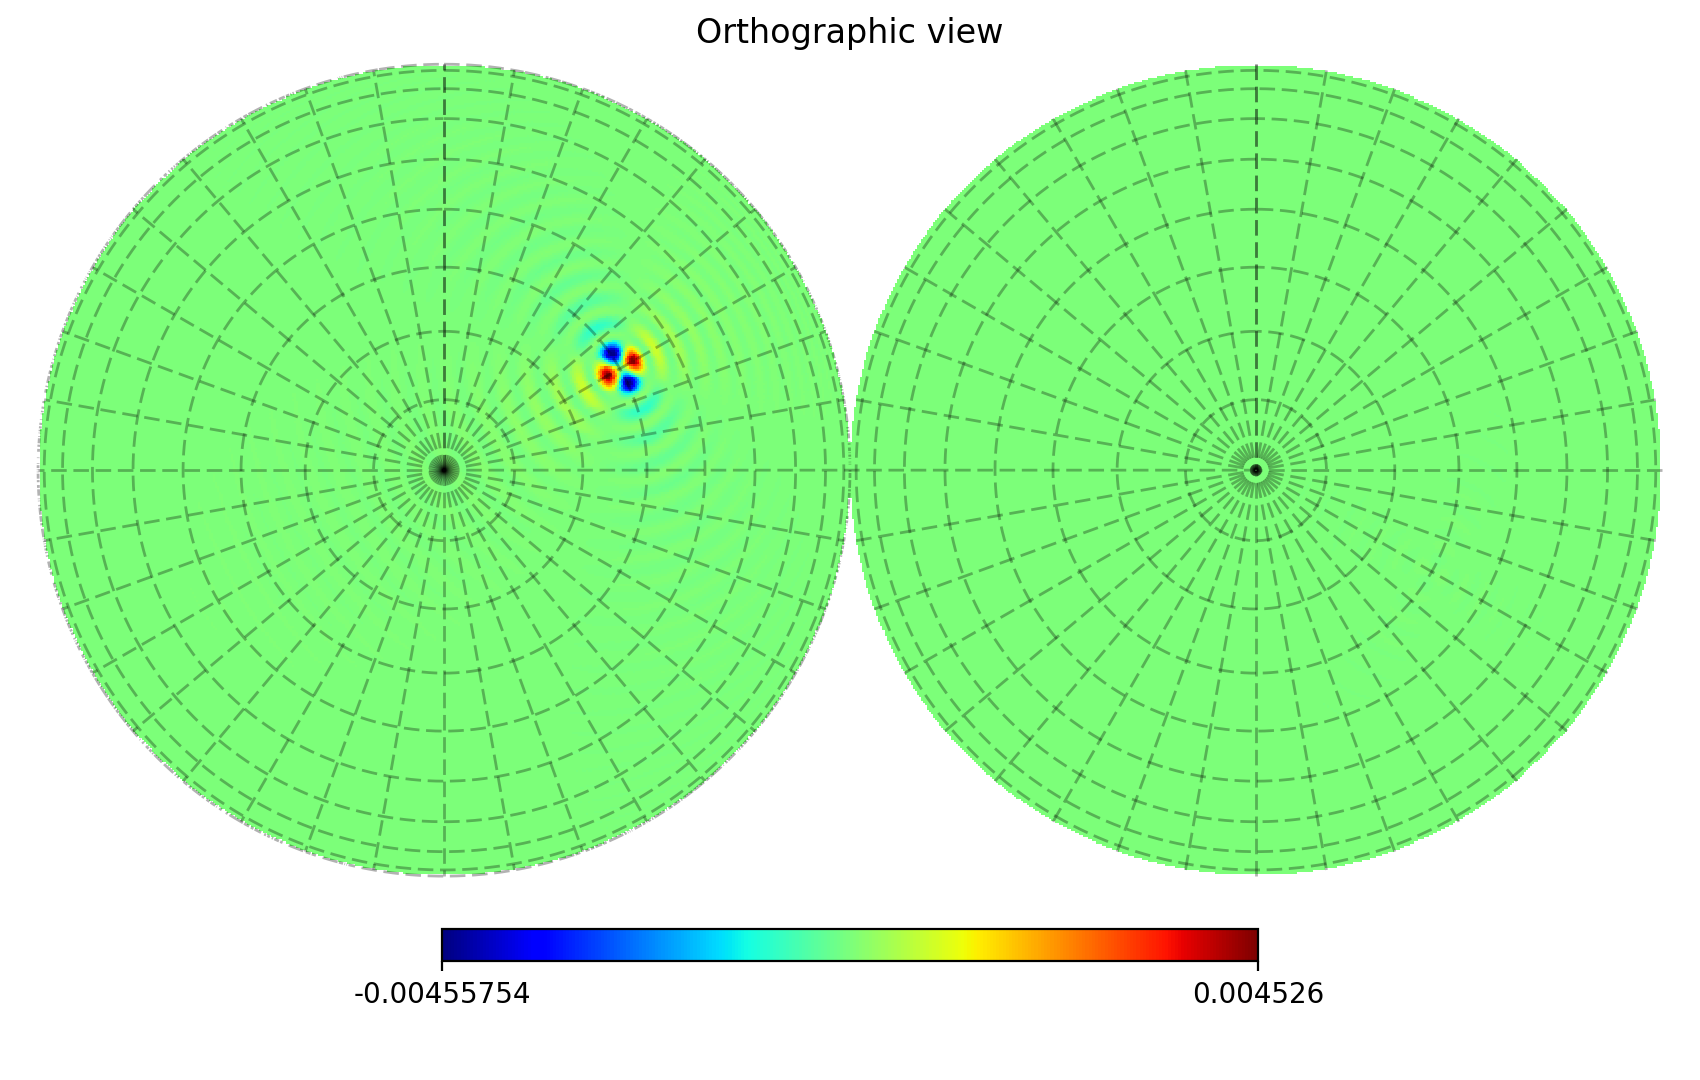

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 10 deg 0.00'.


In [544]:
h.orthview(mr+tebq[0],rot=(0,90)) ; h.graticule(linestyle="dashed",dpar=10,dmer=10,alpha=0.3)
h.orthview(-tebq[0],rot=(0,90)) ; h.graticule(linestyle="dashed",dpar=10,dmer=10,alpha=0.3)




In [400]:
clmr=h.alm2cl(h.map2alm(mr,lmax=lmax))
clmi=h.alm2cl(h.map2alm(mi,lmax=lmax))
cltebq=h.alm2cl(h.map2alm(tebq,lmax=lmax,pol=False))
cltebu=h.alm2cl(h.map2alm(tebu,lmax=lmax,pol=False))
cldiff=h.alm2cl(h.map2alm(-mrp-tebq[1],lmax=lmax))

<IPython.core.display.Javascript object>


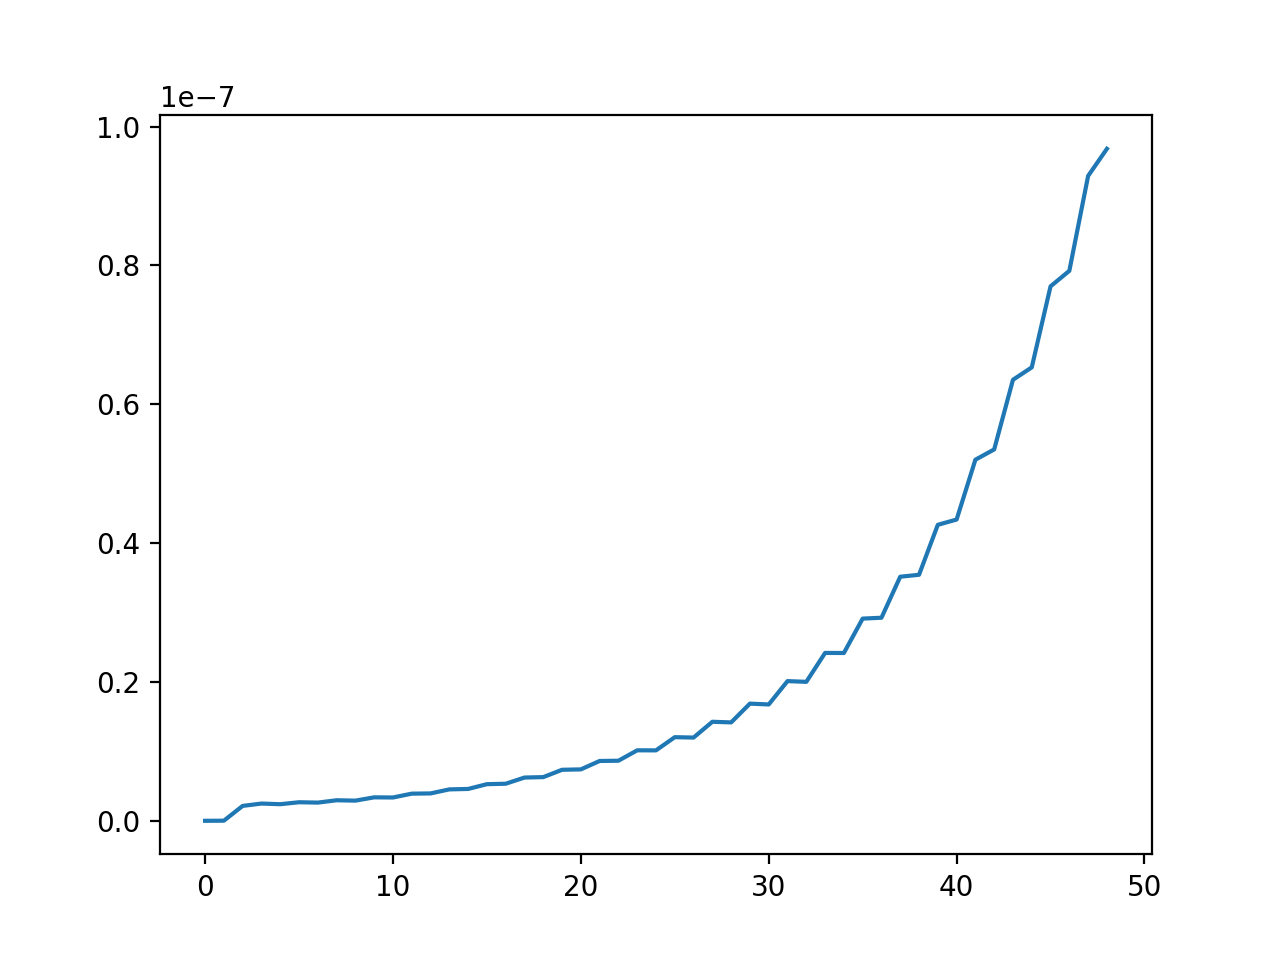

In [401]:
d=-mrp-tebq[1][:]
d[d!=d]=0.
cldiff=h.alm2cl(h.map2alm(d,lmax=lmax))
figure()
plot(cldiff)

<IPython.core.display.Javascript object>


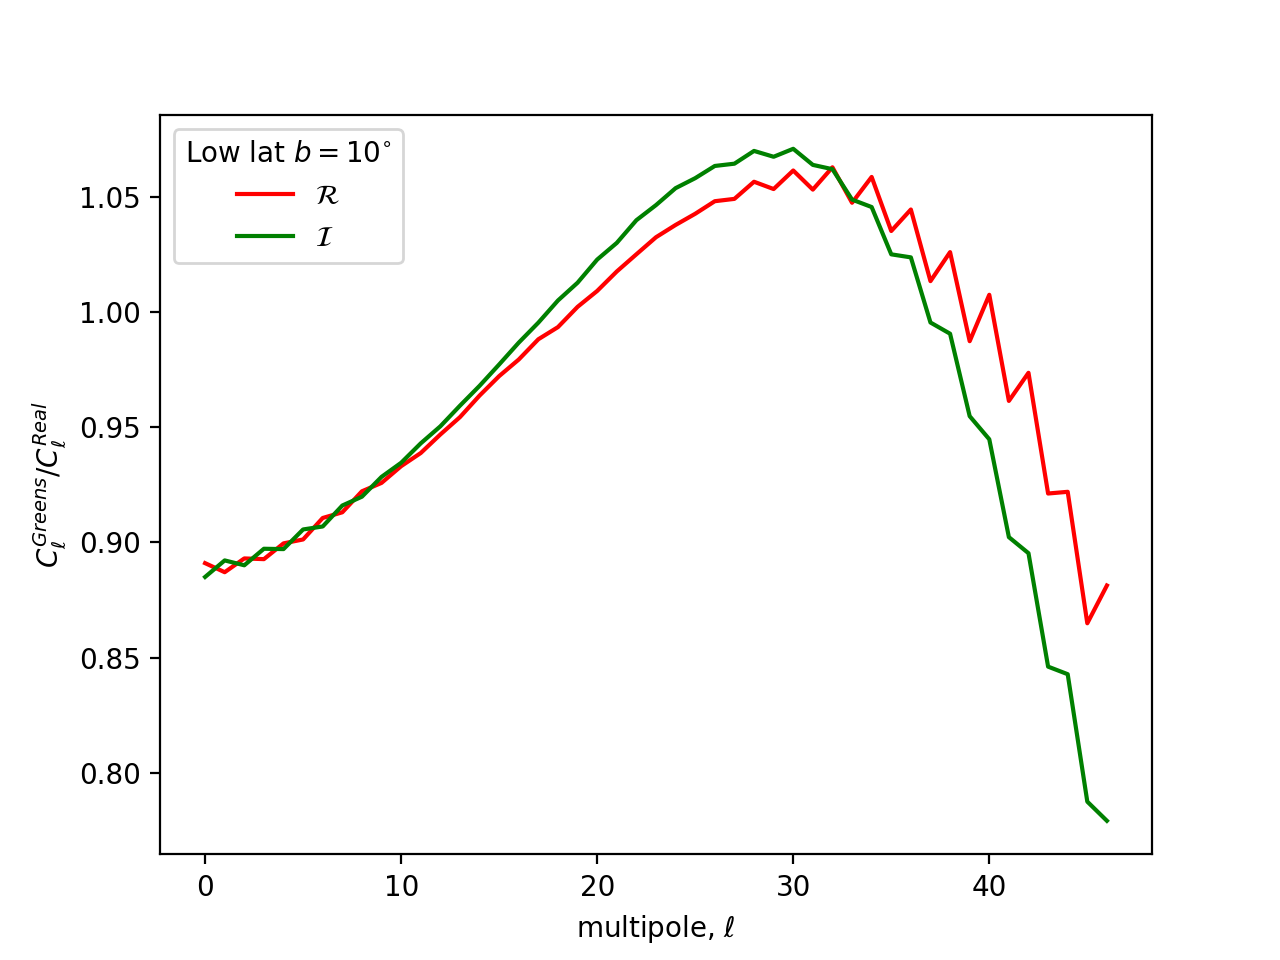

<IPython.core.display.Javascript object>


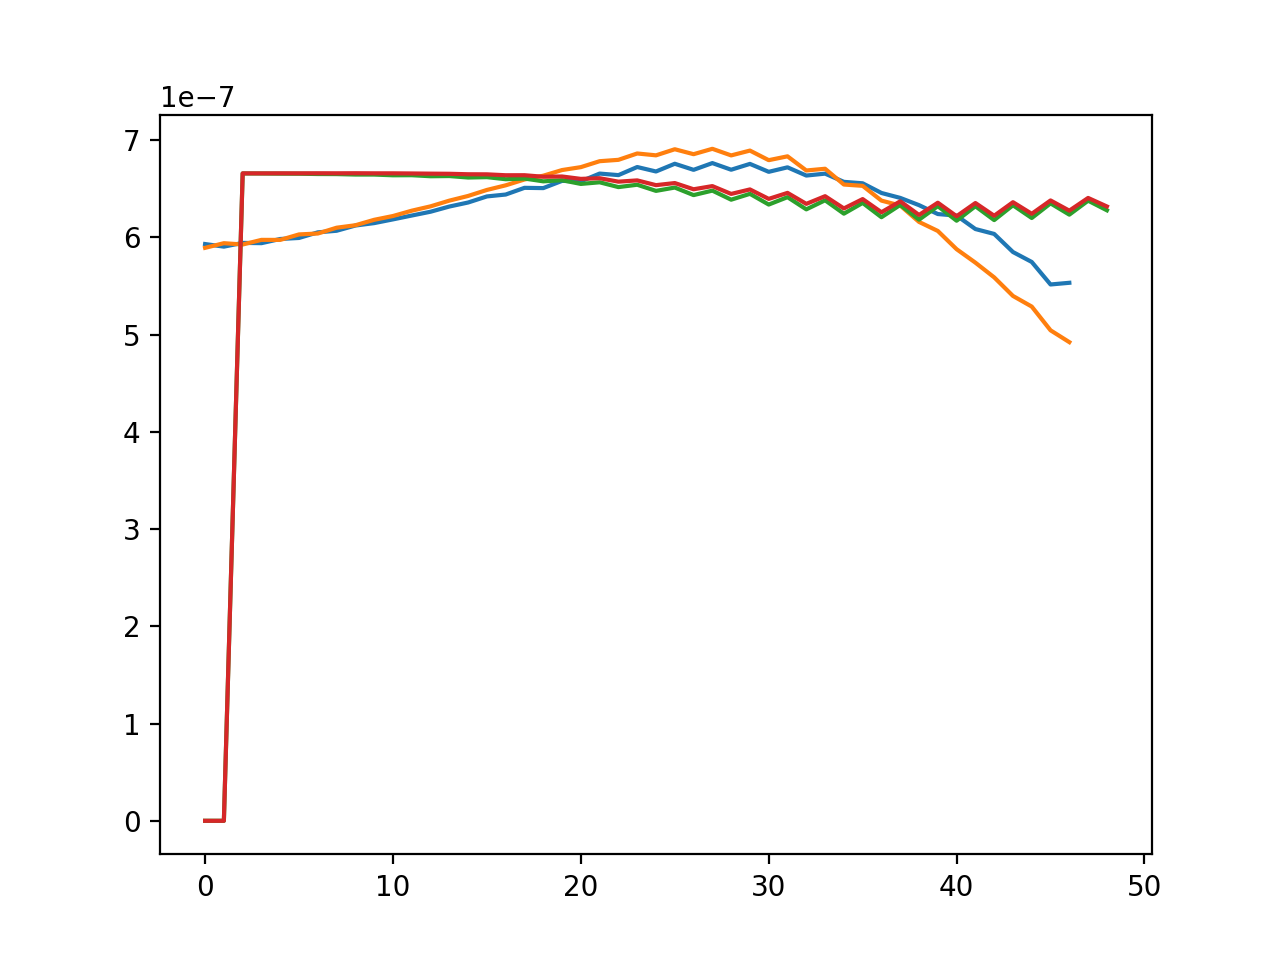

In [402]:
figure()
plot(cltebq[1][2:]/clmr[2:],"r-",label=r"$\mathcal{R}$")
plot(cltebq[2][2:]/clmi[2:],"g-",label=r"$\mathcal{I}$")
#ylim(0.995,1.005)
xlabel("multipole, $\ell$")
ylabel(r"$C^{Greens}_{\ell}/C^{Real}_{\ell}$")
#legend(loc=0,title=r"Mid latitude $b=45^{\circ}$")
#savefig("../../figures/ps_kernel_midlat.pdf",bbox_inches="tight")
#legend(loc=0,title=r"Pole $b=90^{\circ}$")
#savefig("../../figures/ps_kernel_pole.pdf",bbox_inches="tight")
legend(loc=0,title=r"Low lat $b=10^{\circ}$")
savefig("../../figures/ps_kernel_lowlat.pdf",bbox_inches="tight")
#legend(loc=0,title=r"High lat $b=98^{\circ}$")
#savefig("../../figures/ps_kernel_highlat.pdf",bbox_inches="tight")
#legend(loc=0,title=r"Equator $b=0^{\circ}$")
#savefig("../../figures/ps_kernel_equator.pdf",bbox_inches="tight")

figure()
plot(cltebq[1][2:])
plot(cltebq[2][2:])
plot(clmr)
plot(clmi)





0.871186959617
0.941426150364


<IPython.core.display.Javascript object>


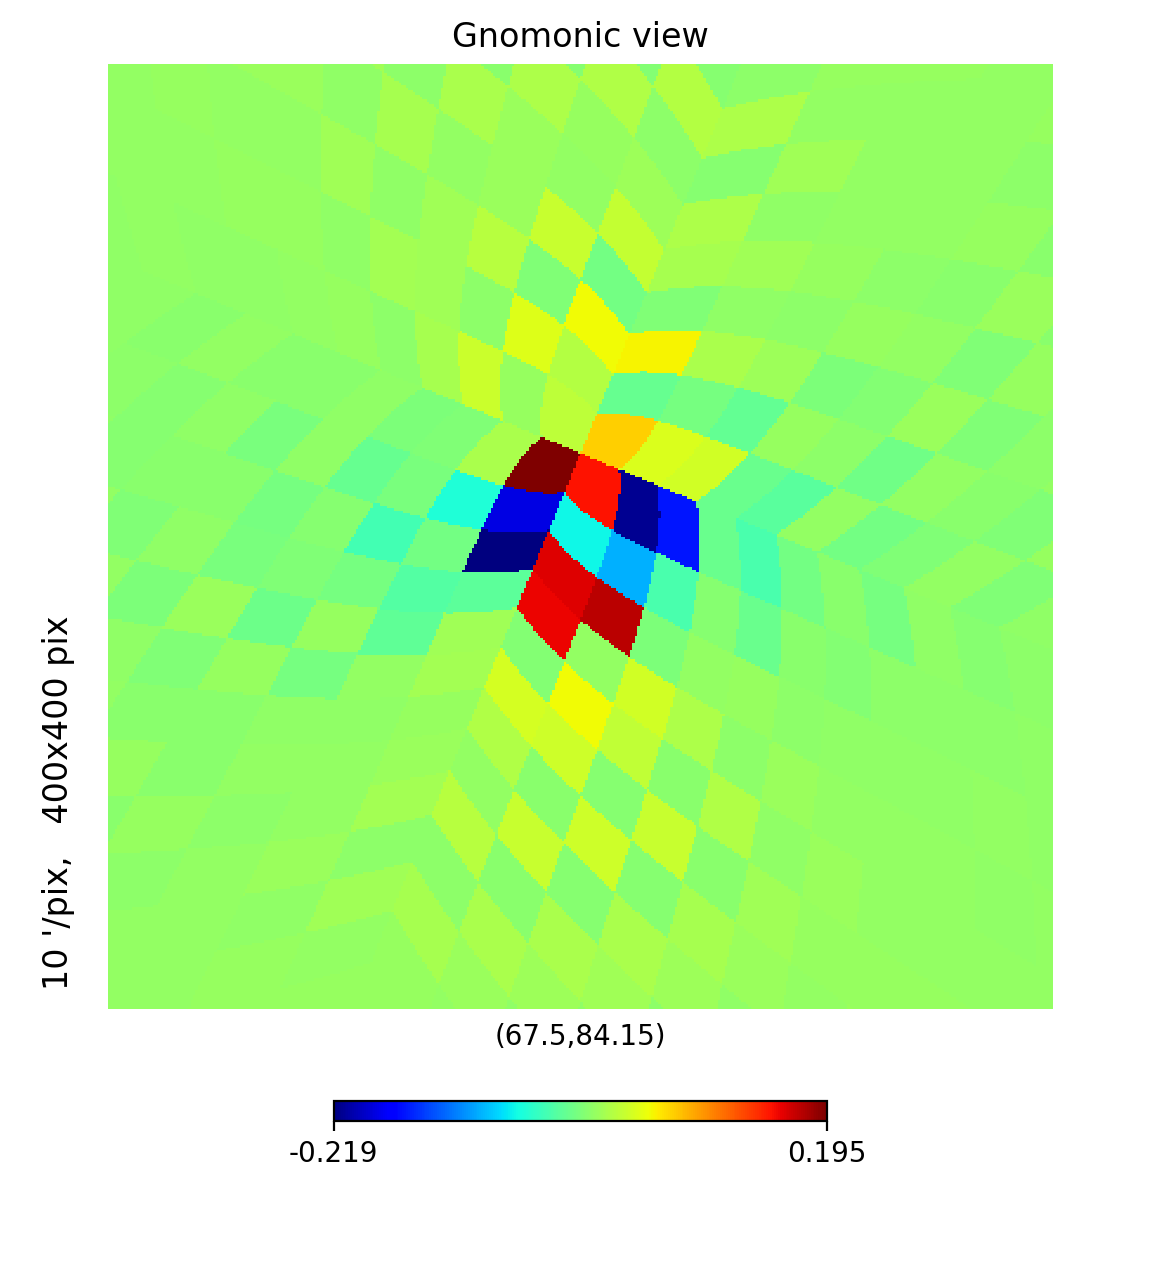

<IPython.core.display.Javascript object>


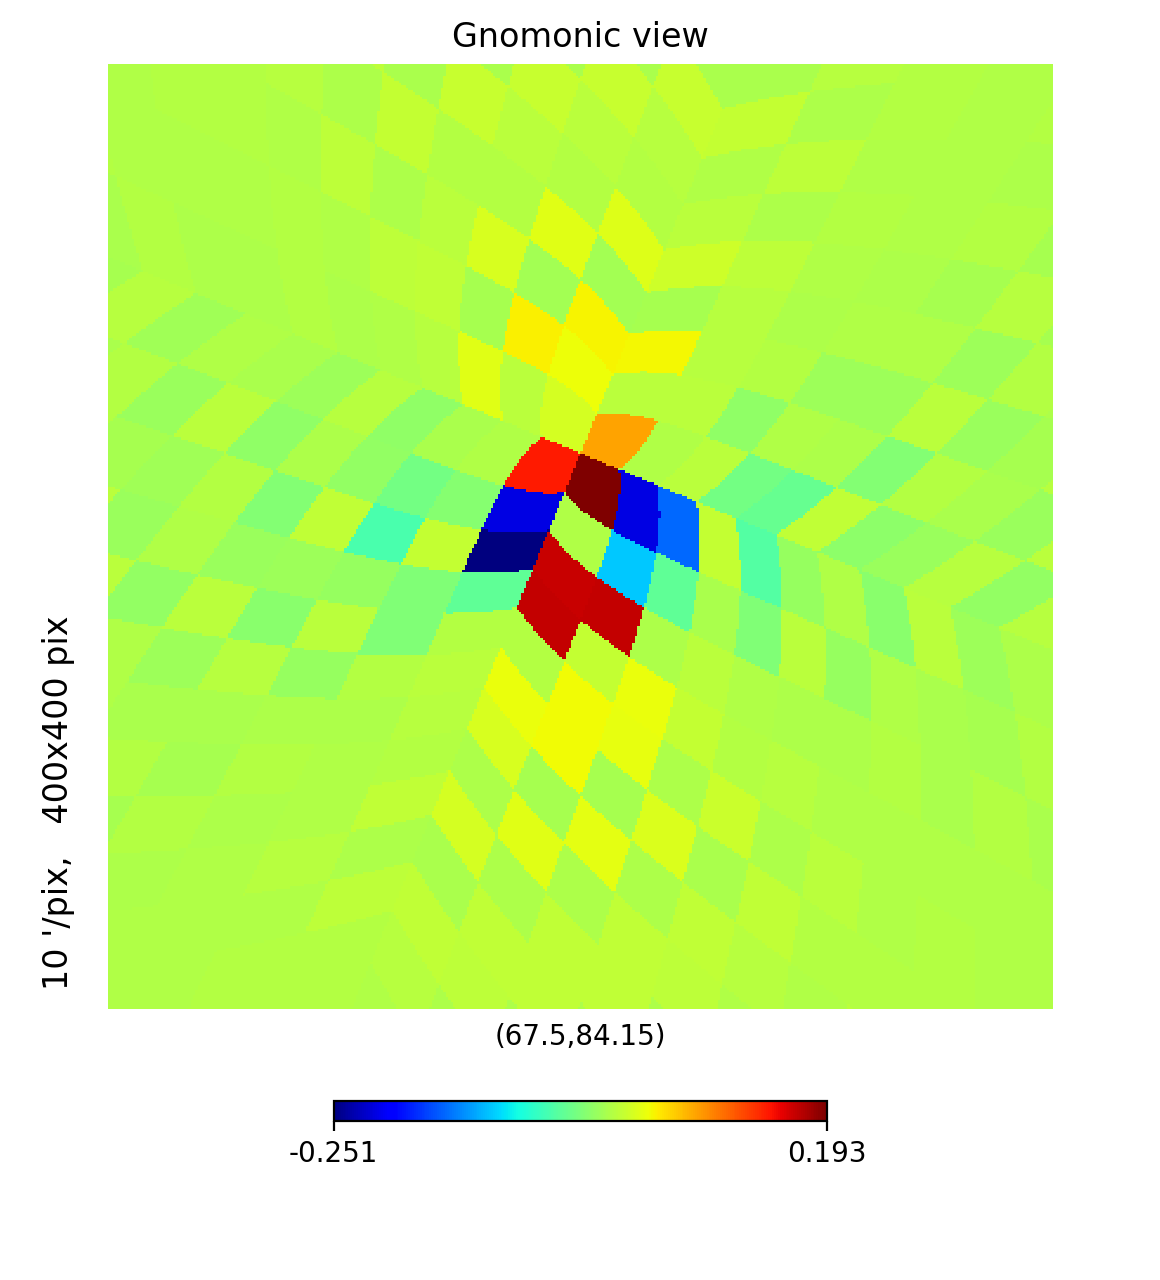

In [403]:
r=max(abs(-tebq[1]))/max(abs(mrp)) ; print r
r=max(abs(-tebq[2]))/max(abs(mip)) ; print r
h.gnomview(-tebq[1],rot=(phi,90-theta),xsize=400,reso=10)
h.gnomview(mrp,rot=(phi,90-theta),xsize=400,reso=10)

In [407]:
print tebq[1][cpix]
print tebq[2][cpix]

0.0655195470239
-0.0588635735232


<IPython.core.display.Javascript object>


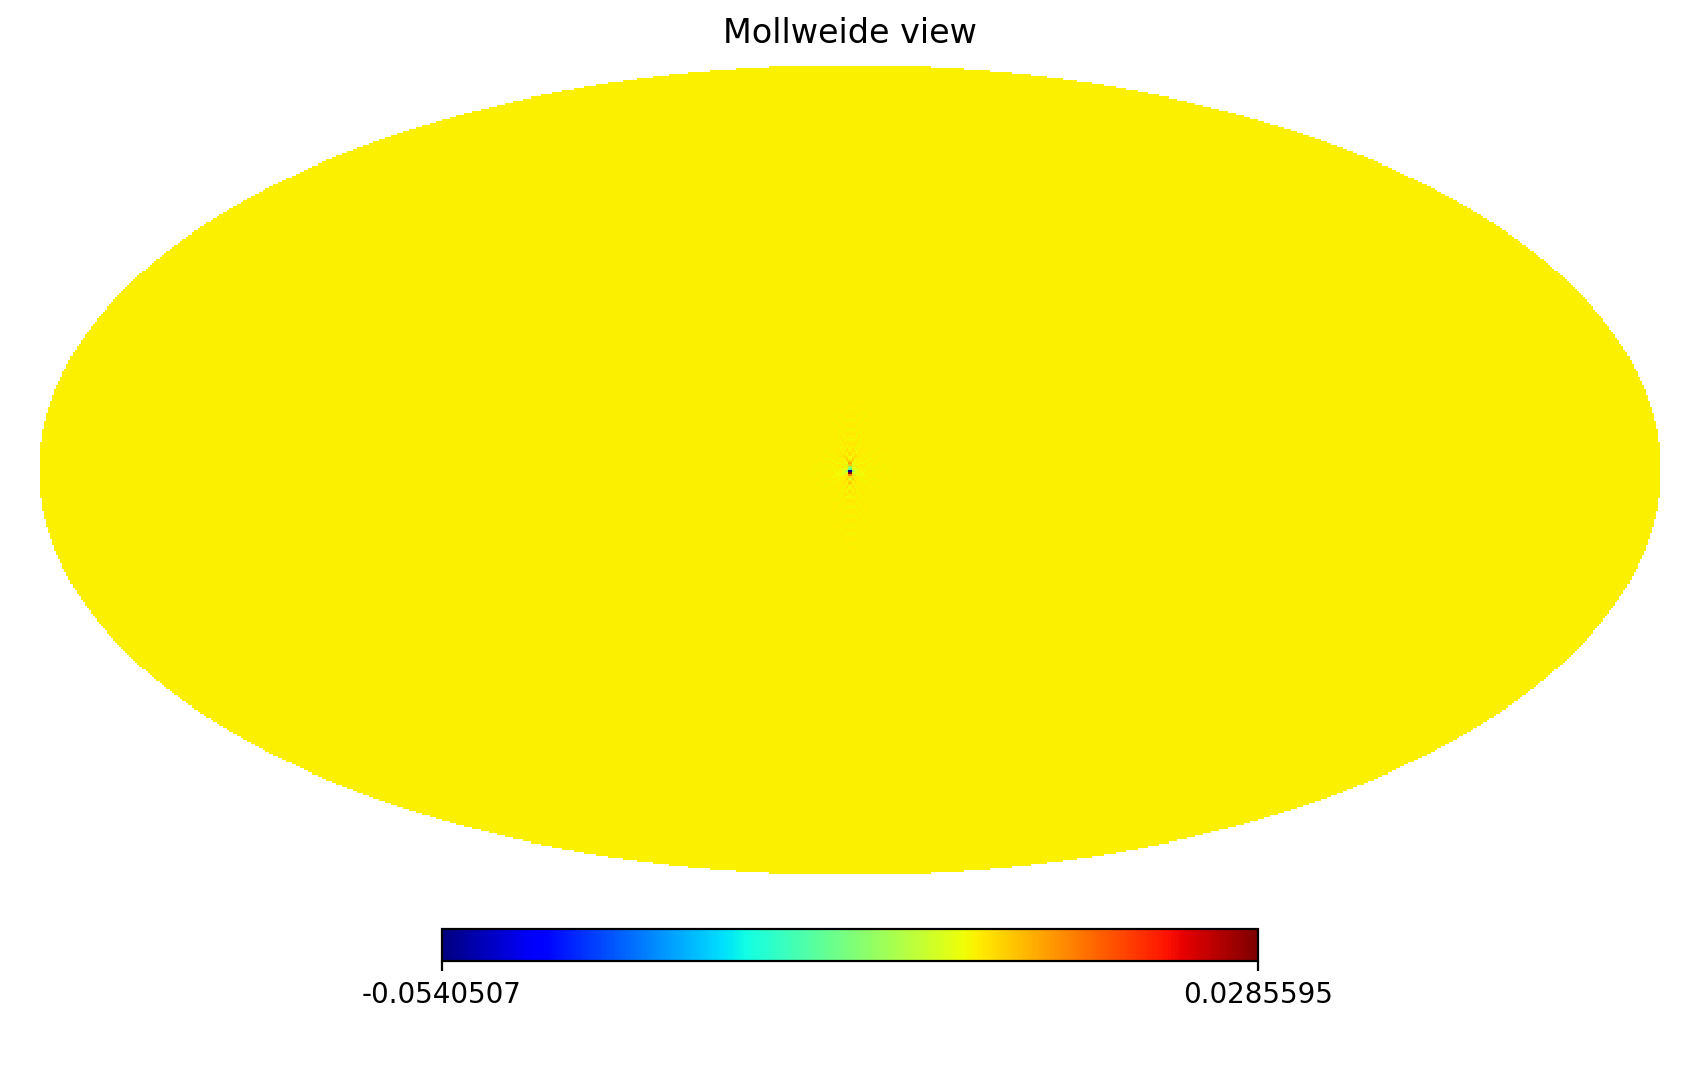

<IPython.core.display.Javascript object>


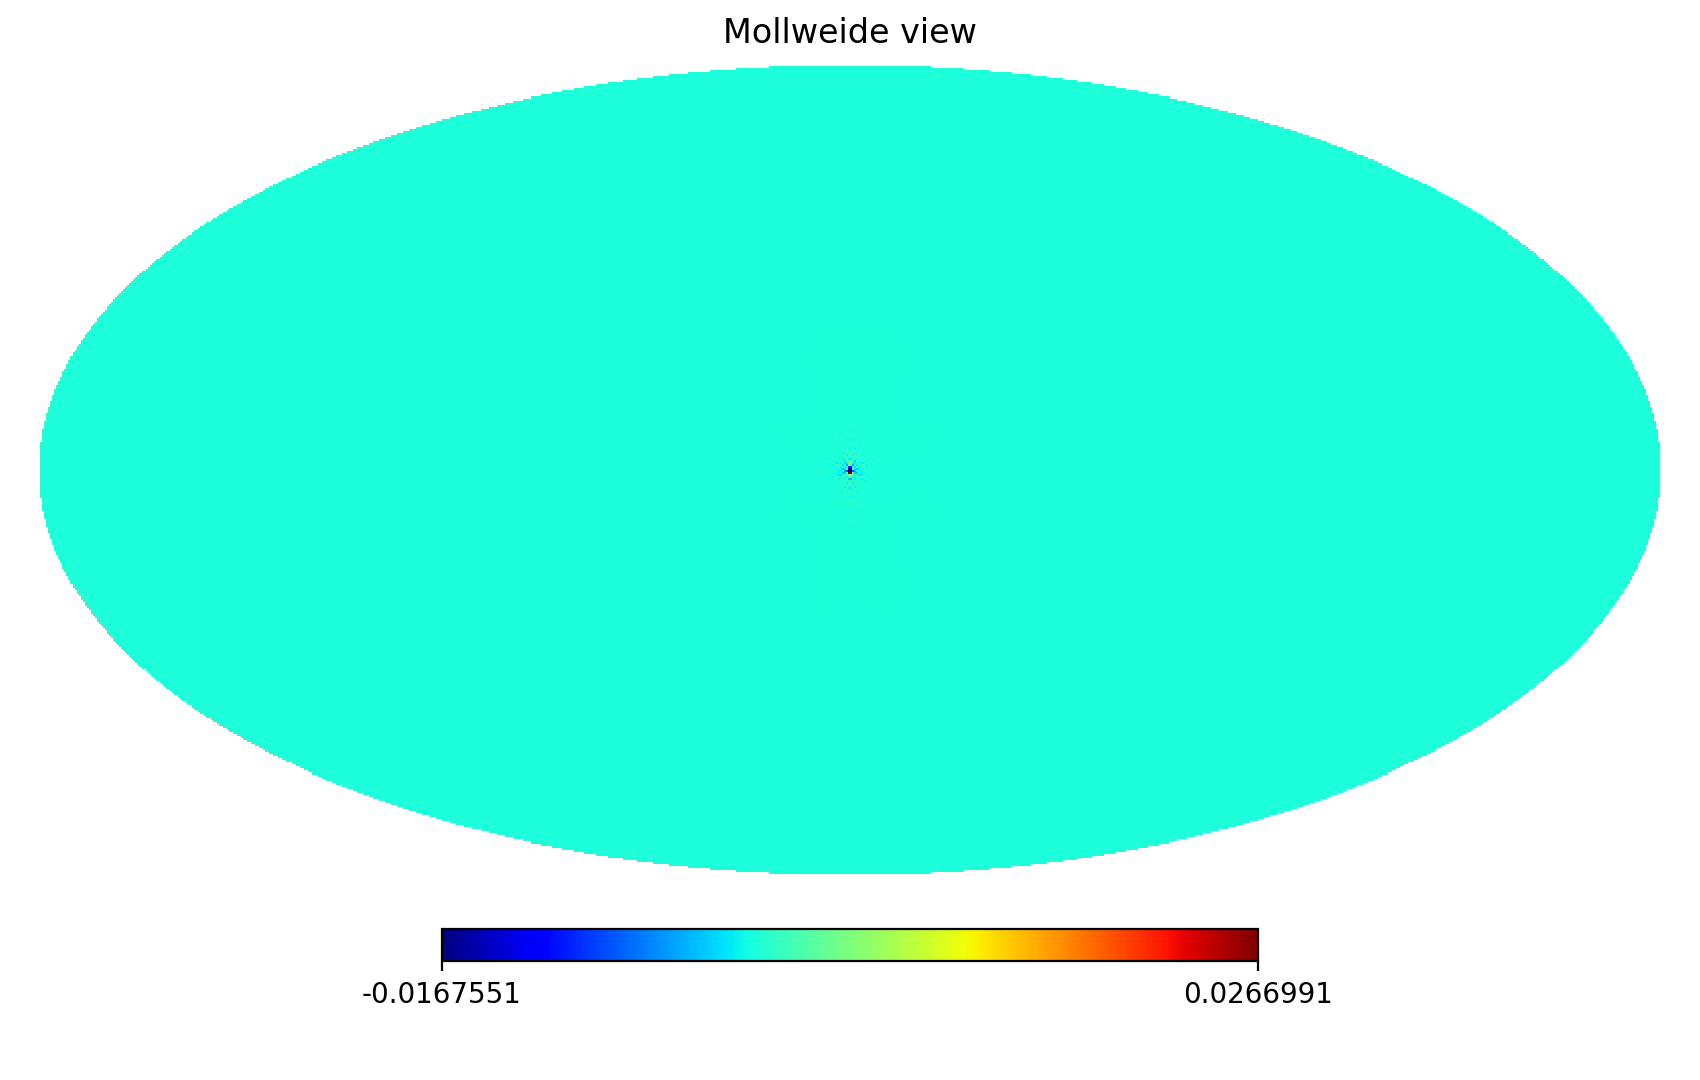

In [353]:
h.mollview((-r*mrp-tebq[1]),rot=(phi,90))
h.mollview((-mrp-tebq[1]),rot=(phi,90))

<IPython.core.display.Javascript object>


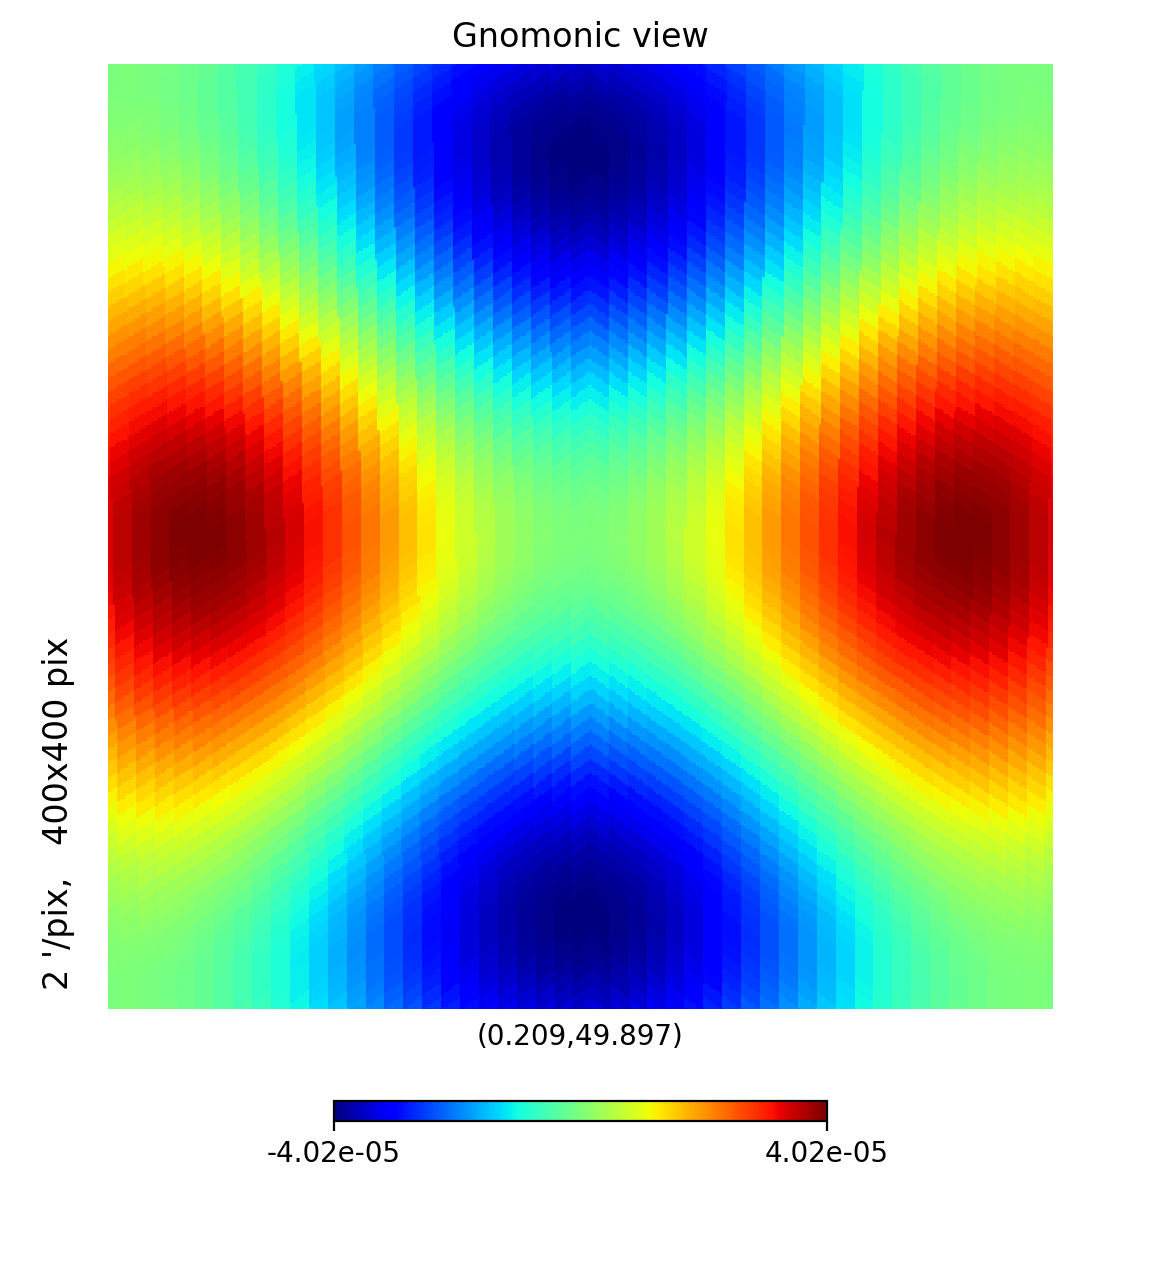

<IPython.core.display.Javascript object>


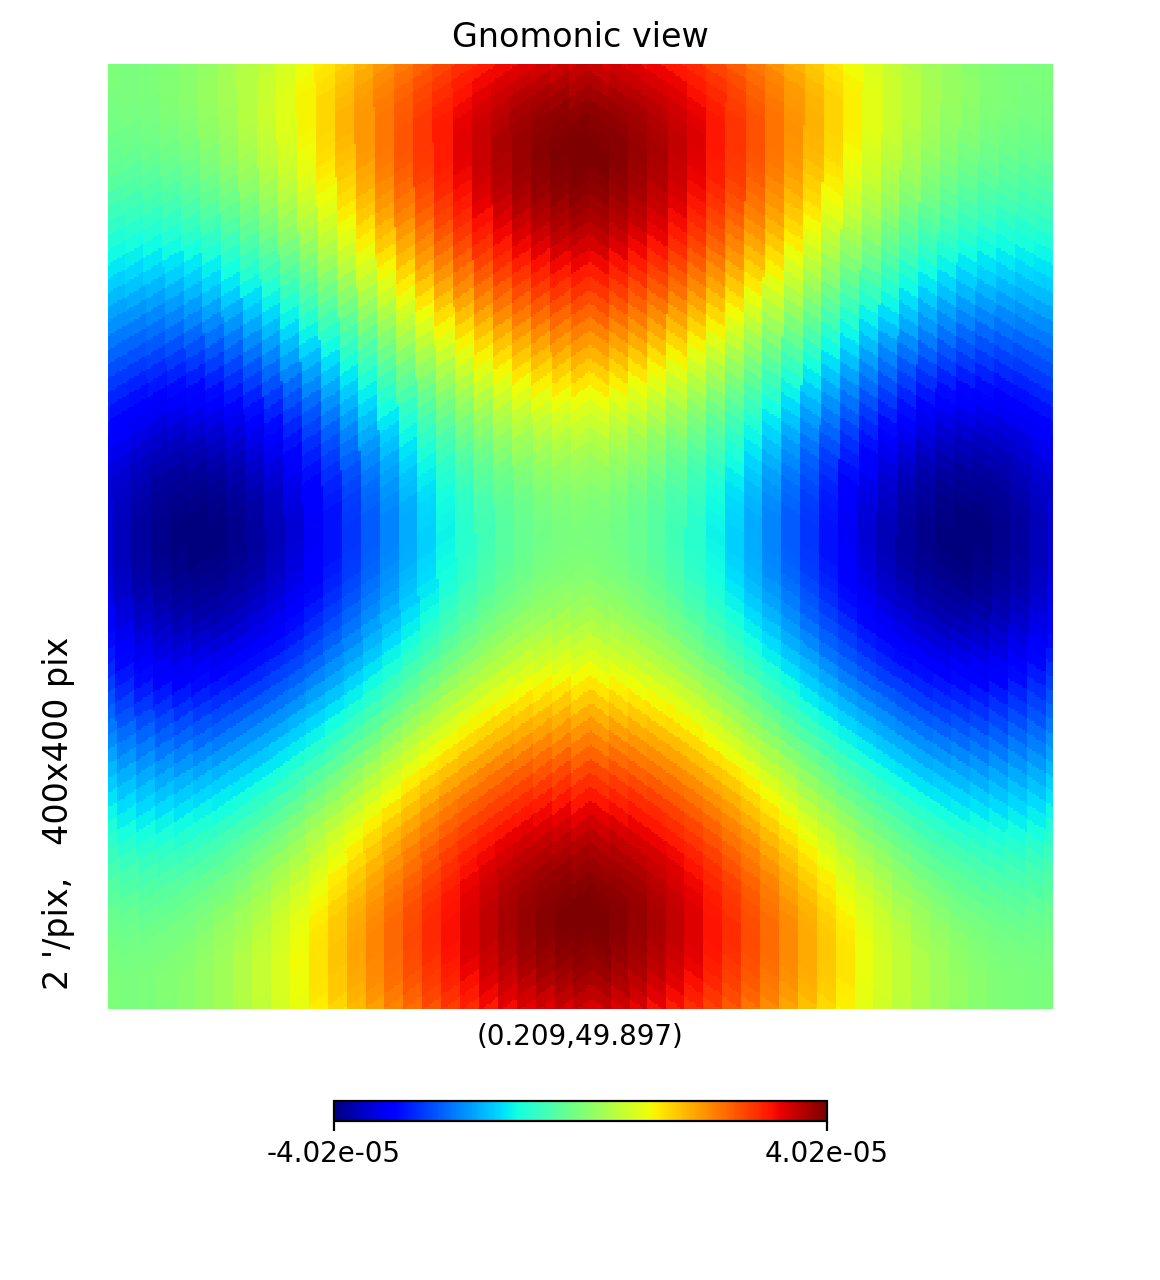

<IPython.core.display.Javascript object>


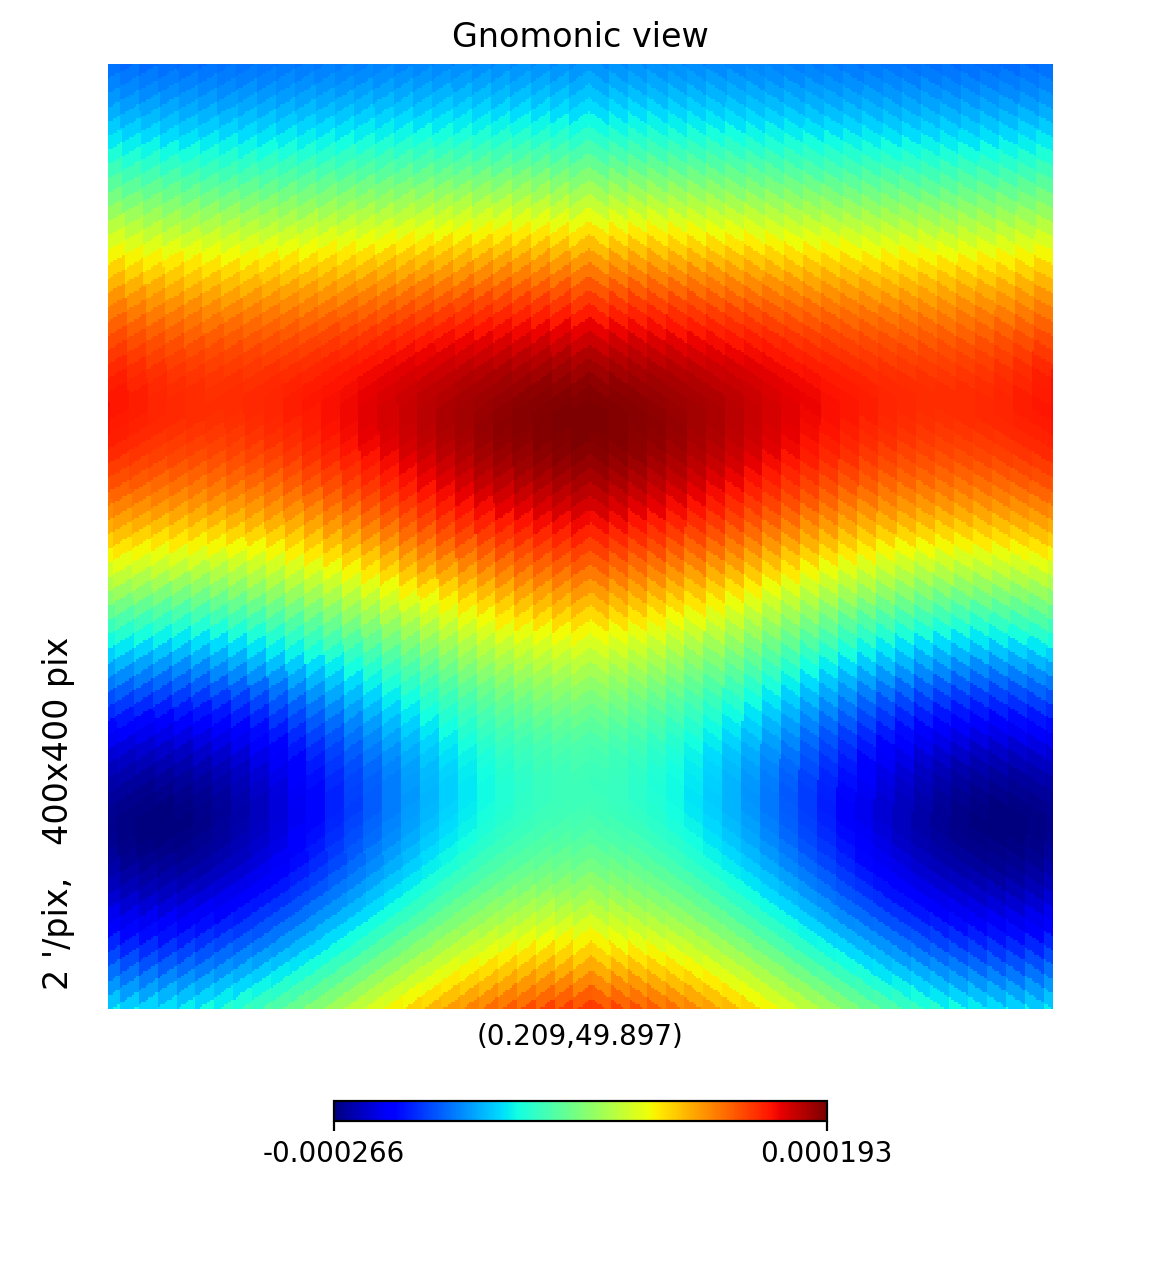

<IPython.core.display.Javascript object>


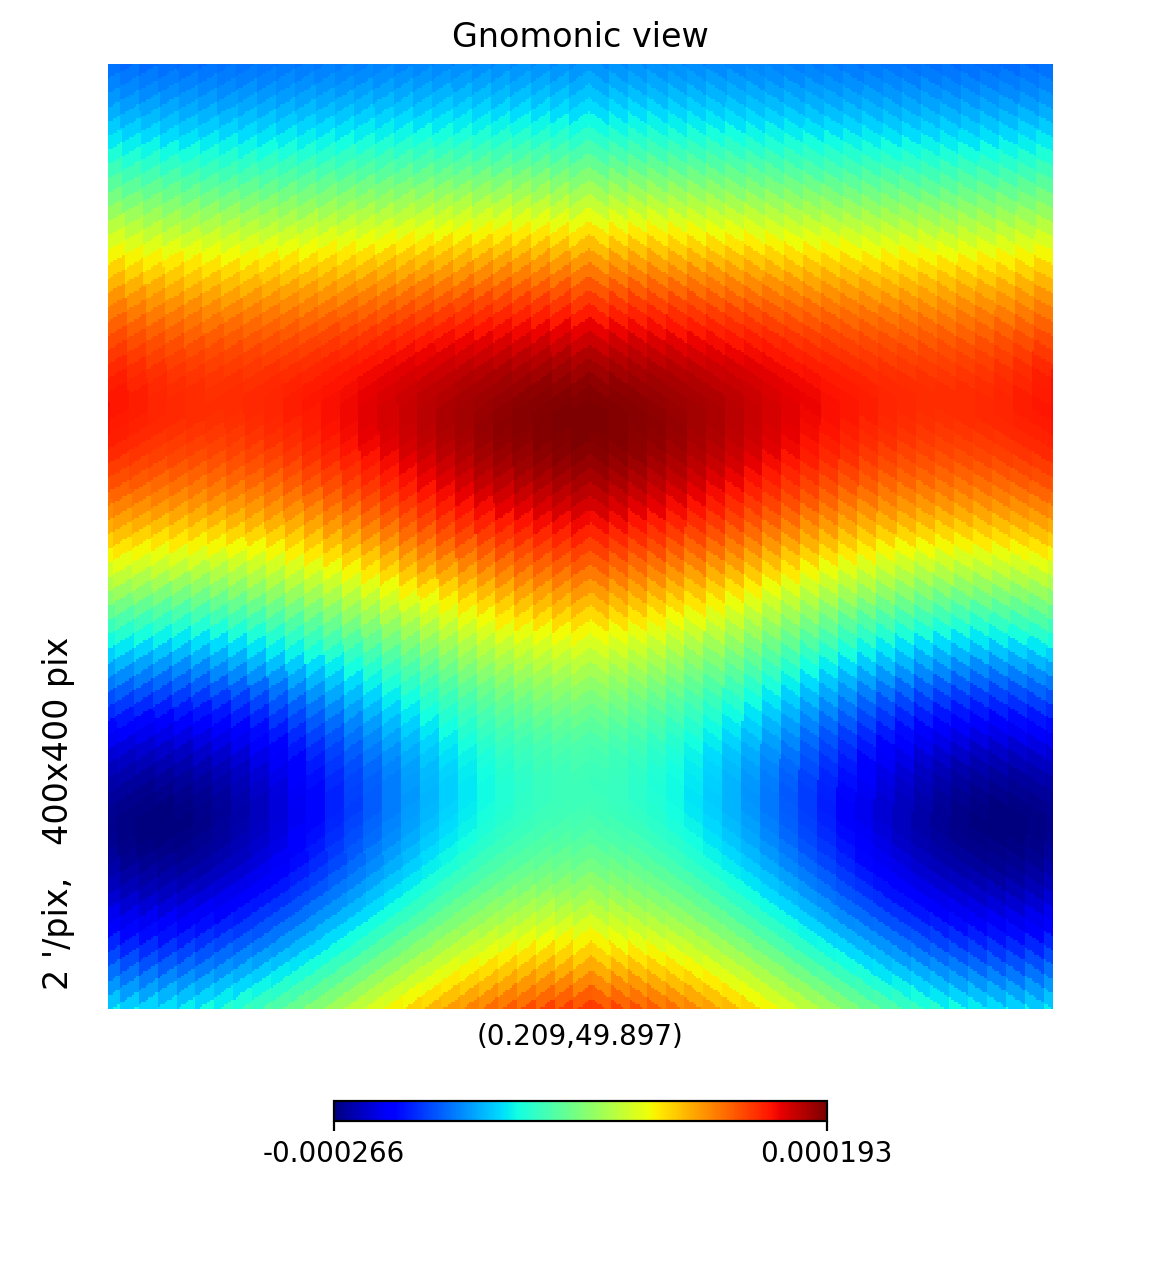

In [86]:
h.gnomview(tebq[1],rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview(mr,rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((tebq[1]+mr)*100/max(mr),rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((tebq[1]+mrp)*100/max(mrp),rot=(phi,90-theta),xsize=400,reso=2)

In [78]:
h.pix2ang?

<IPython.core.display.Javascript object>


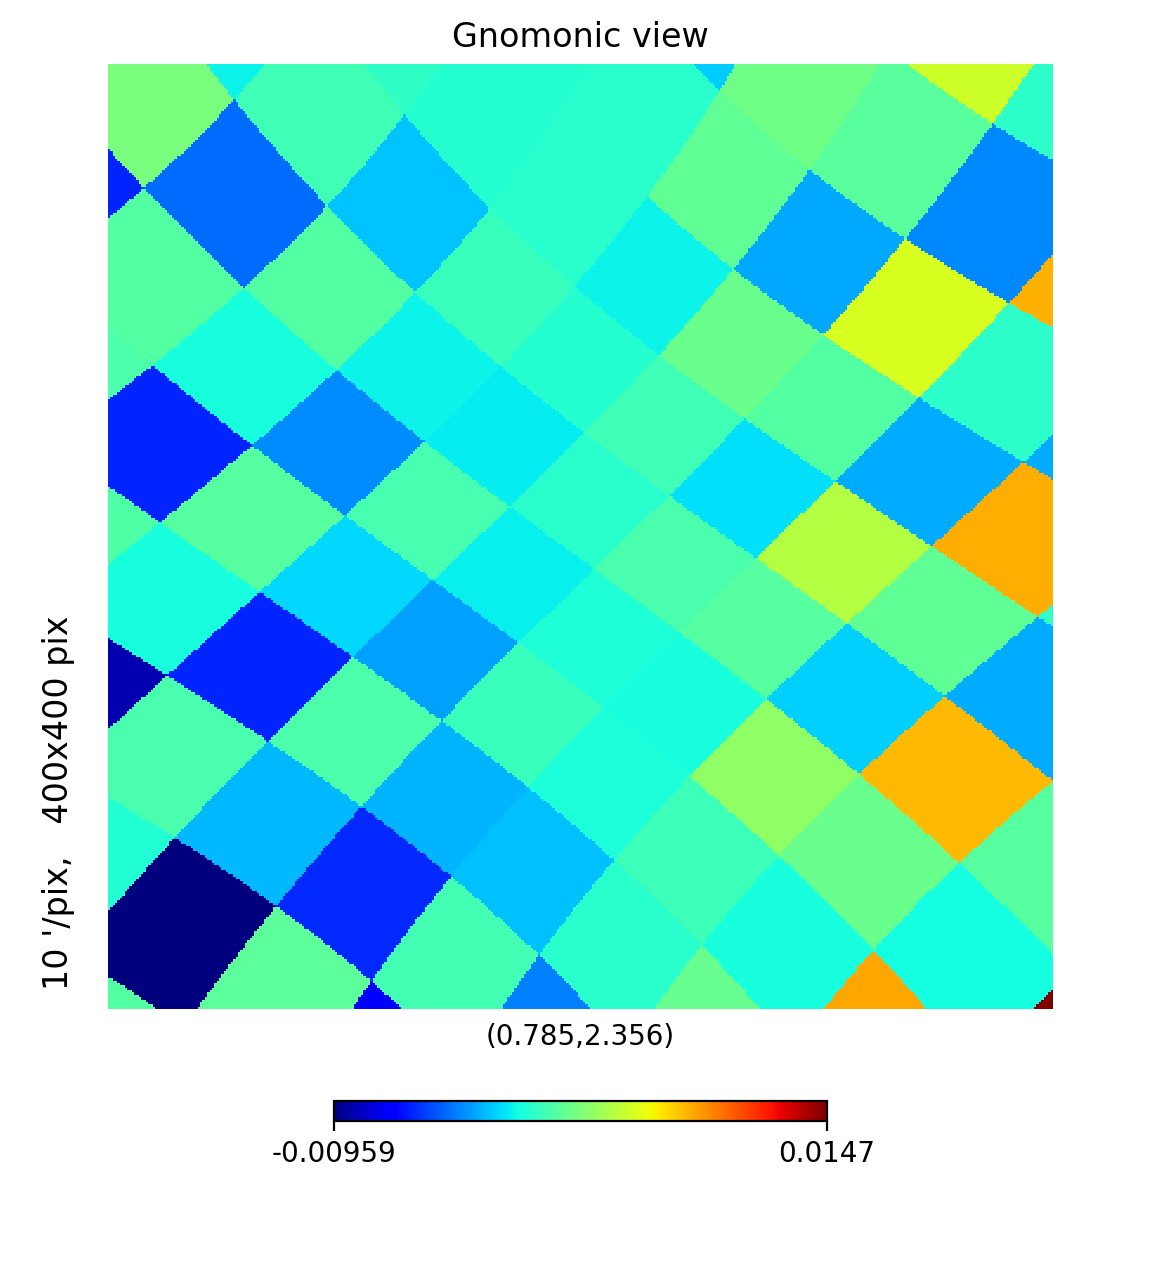

<IPython.core.display.Javascript object>


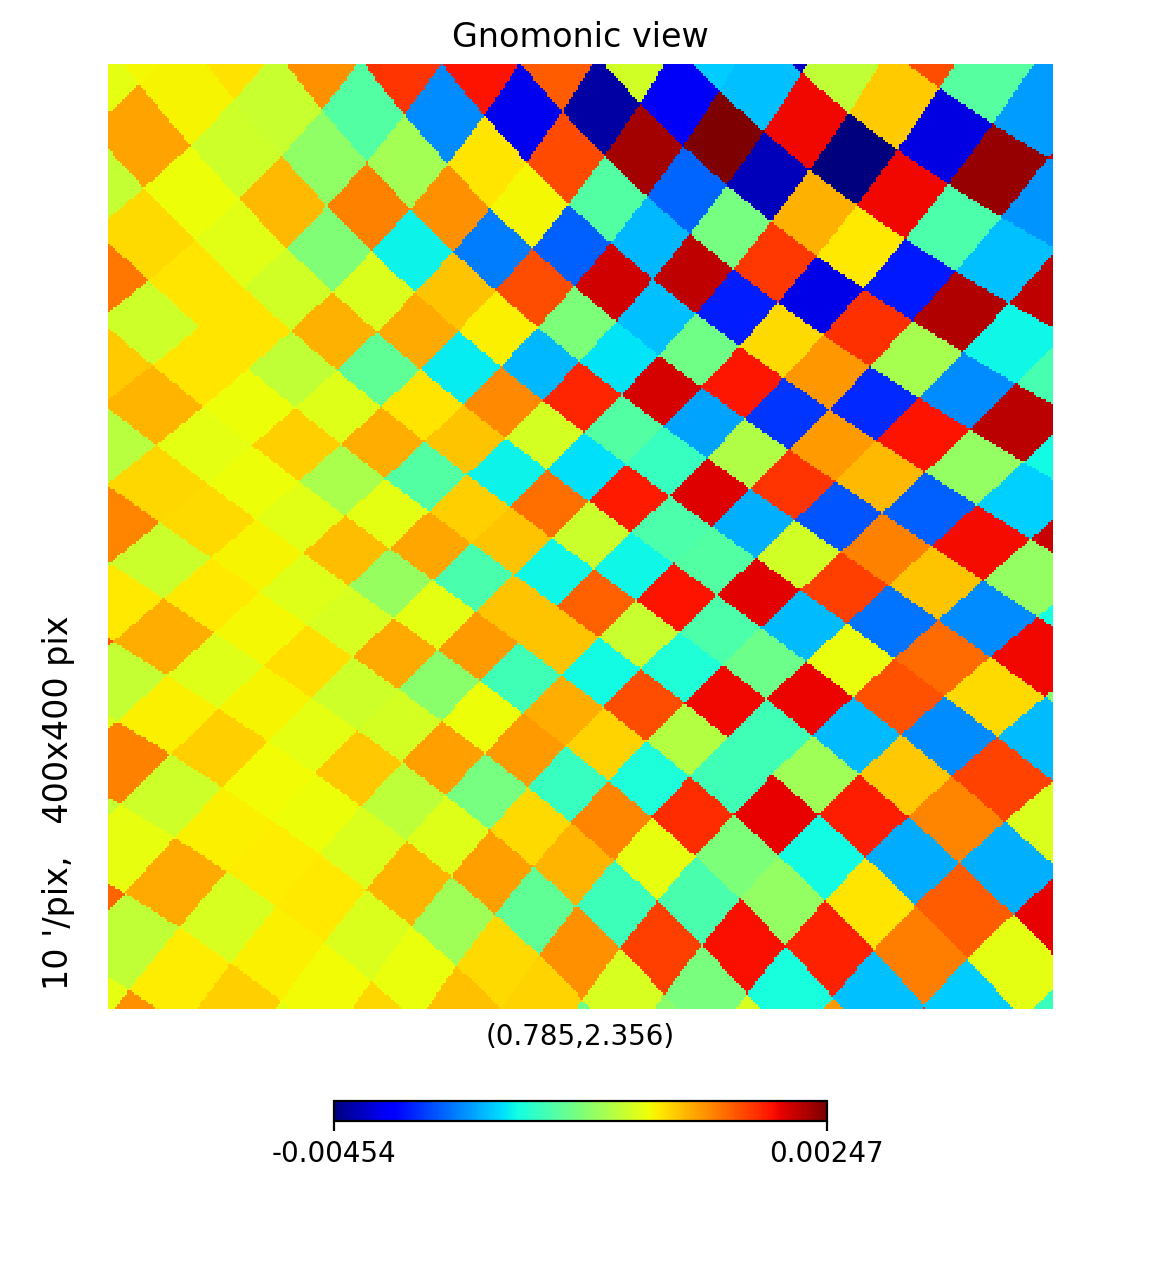

In [485]:
h.gnomview(-tebq[1]*1,rot=(phi,90-theta),xsize=400,reso=10)
h.gnomview(mr,rot=(phi,90-theta),xsize=400,reso=10)


#h.gnomview((tebq[2]+mi)*1,rot=(phi,90-theta),xsize=400,reso=2)
#h.gnomview(mr,rot=(phi,90-theta),xsize=400,reso=2)
#h.gnomview(mi,rot=(phi,90-theta),xsize=400,reso=2)





<IPython.core.display.Javascript object>


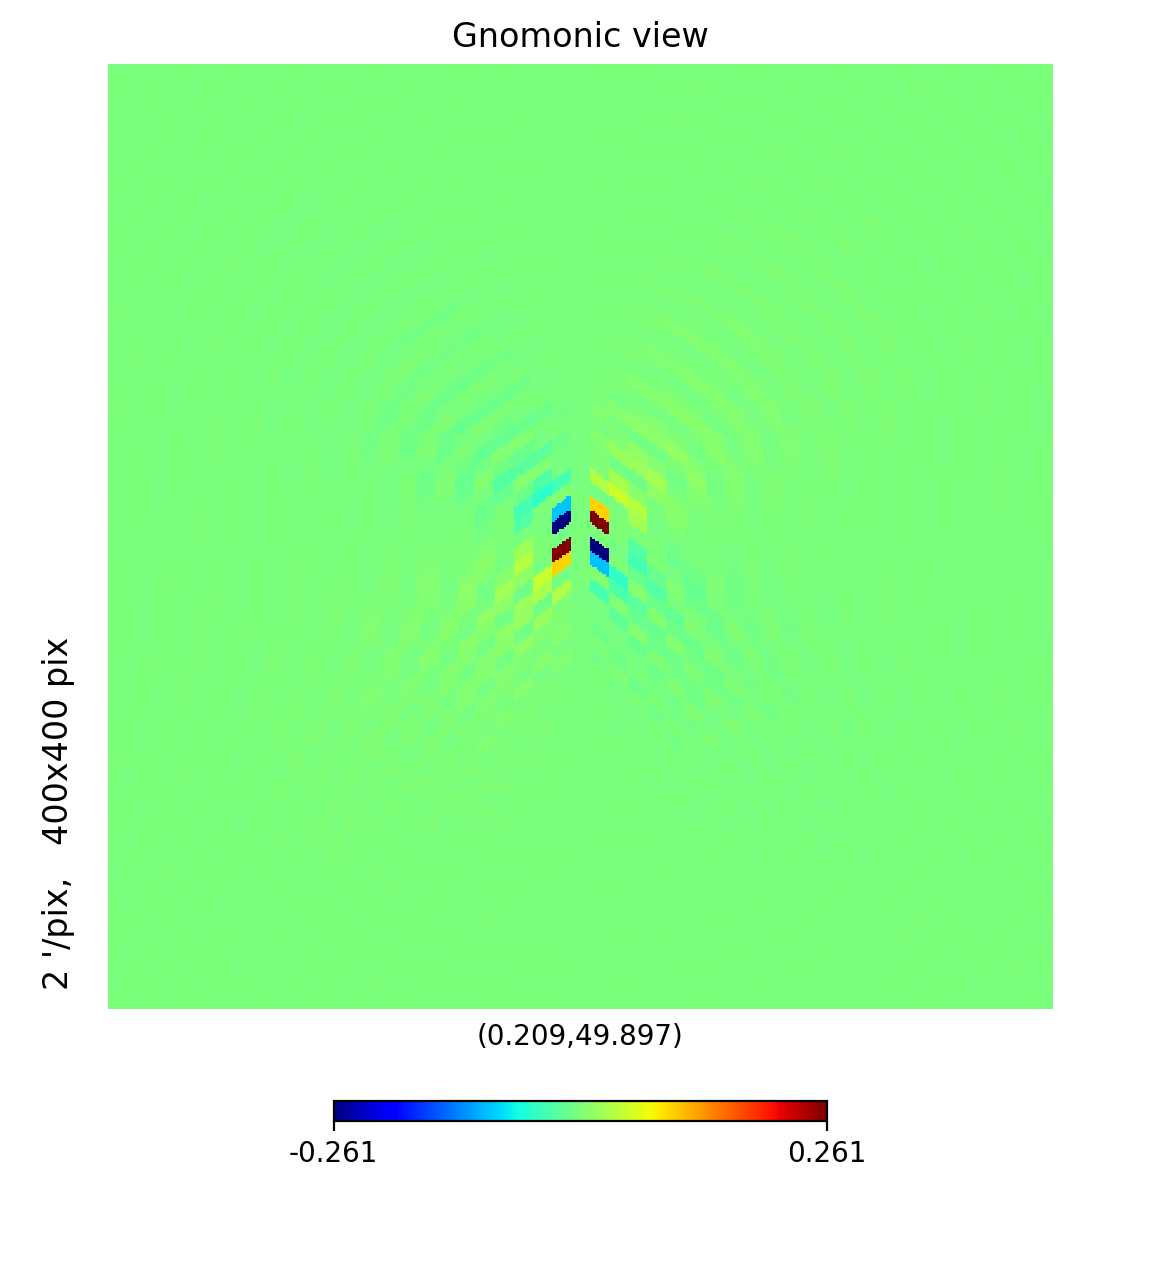

<IPython.core.display.Javascript object>


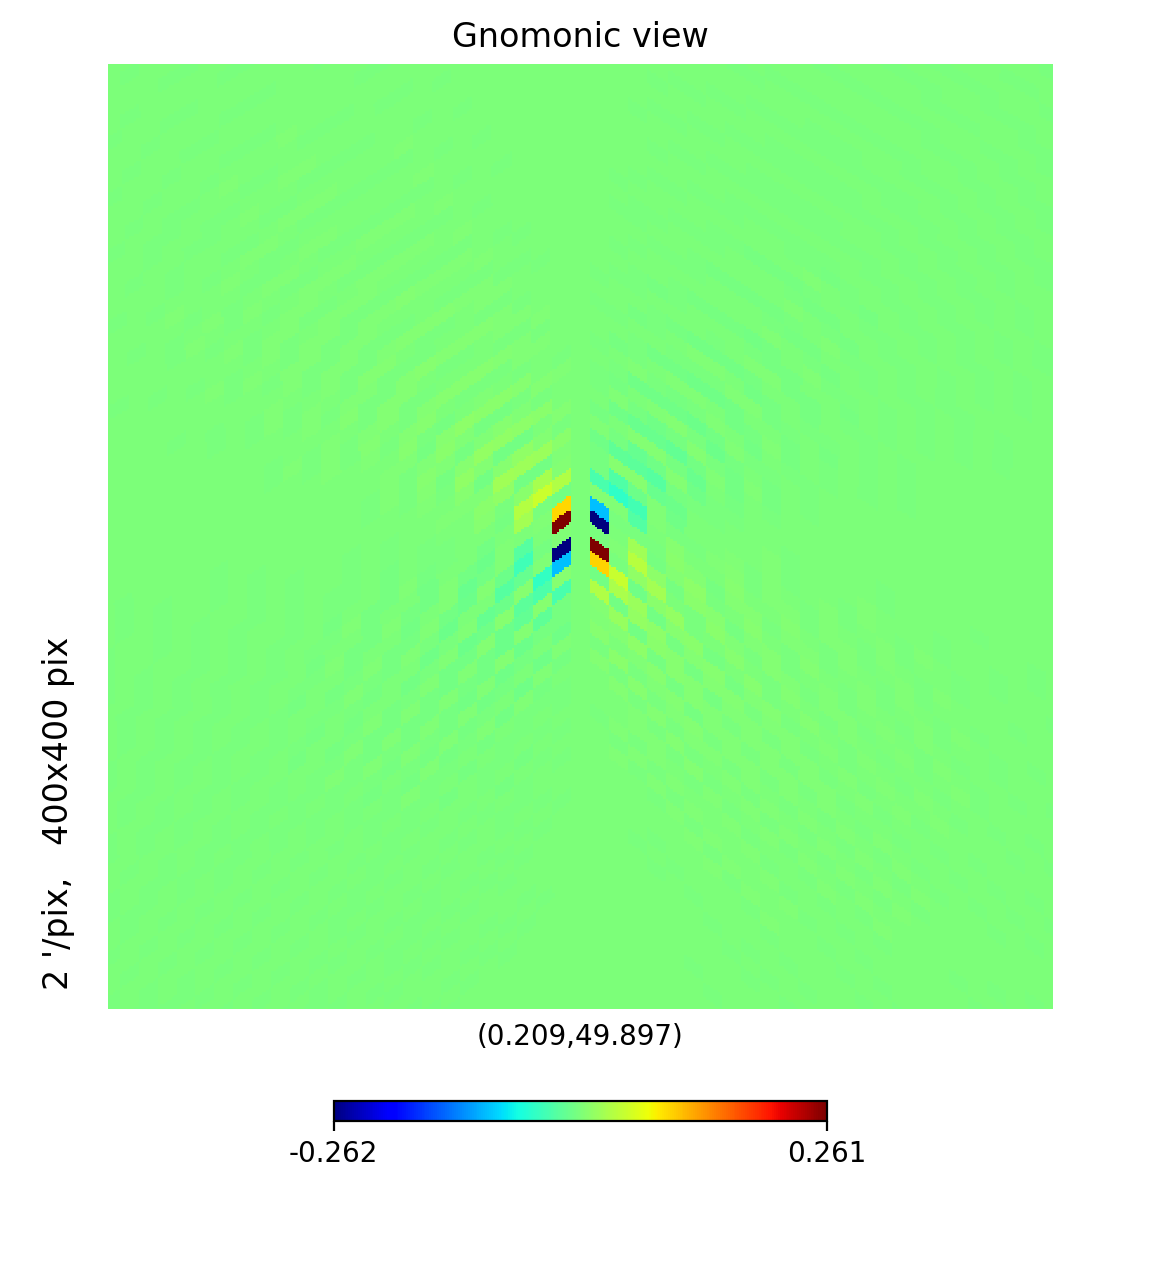

<IPython.core.display.Javascript object>


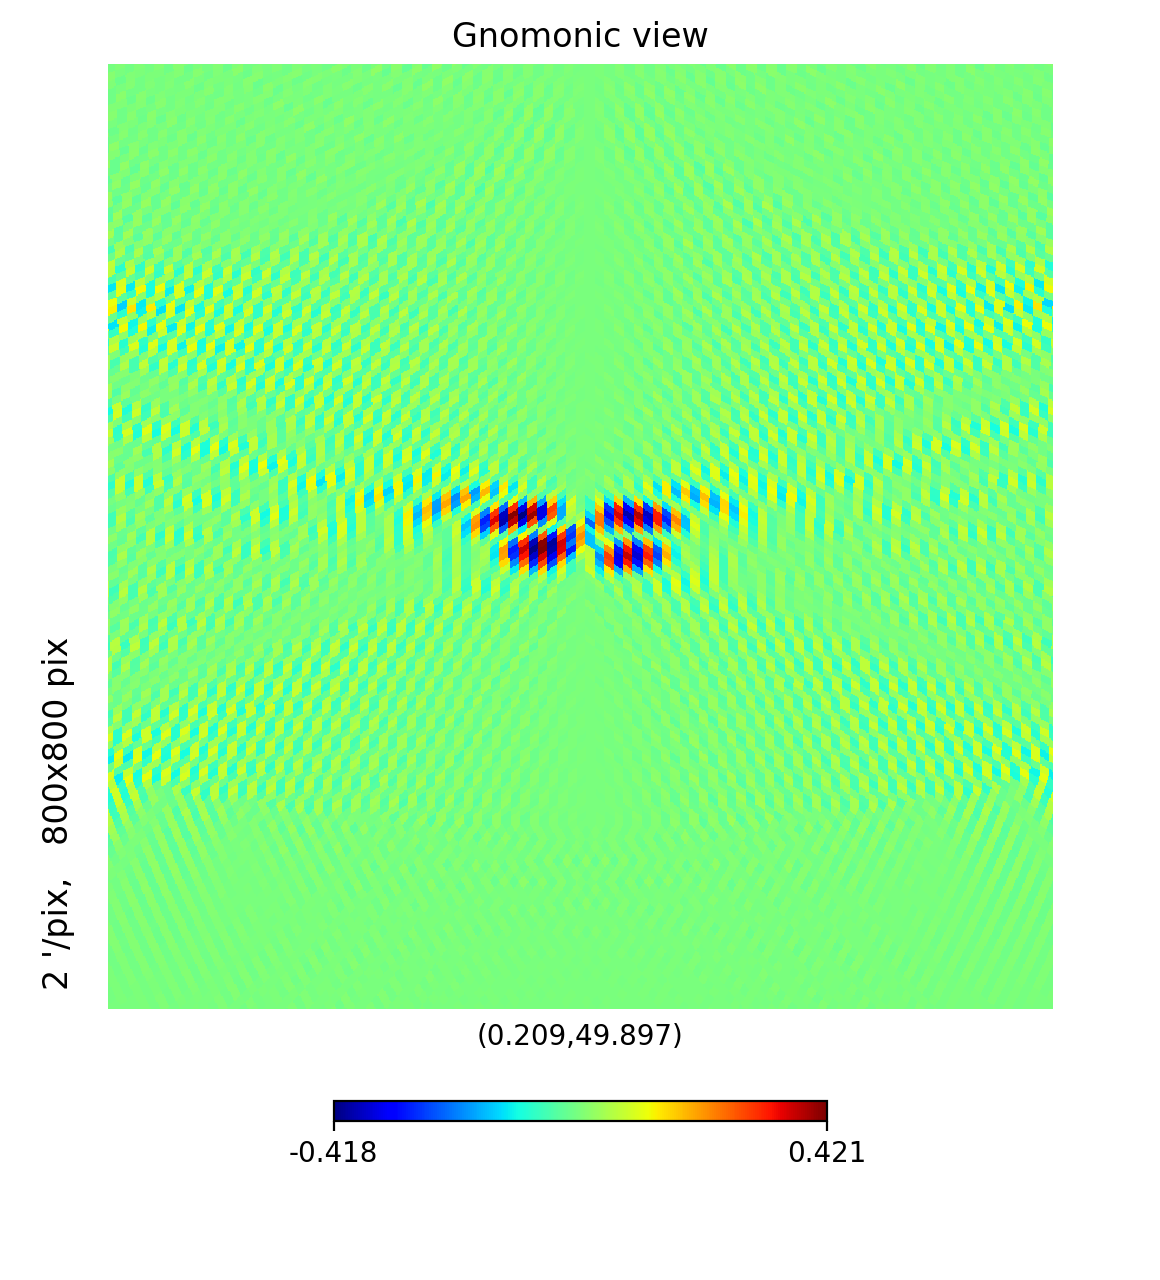

<IPython.core.display.Javascript object>


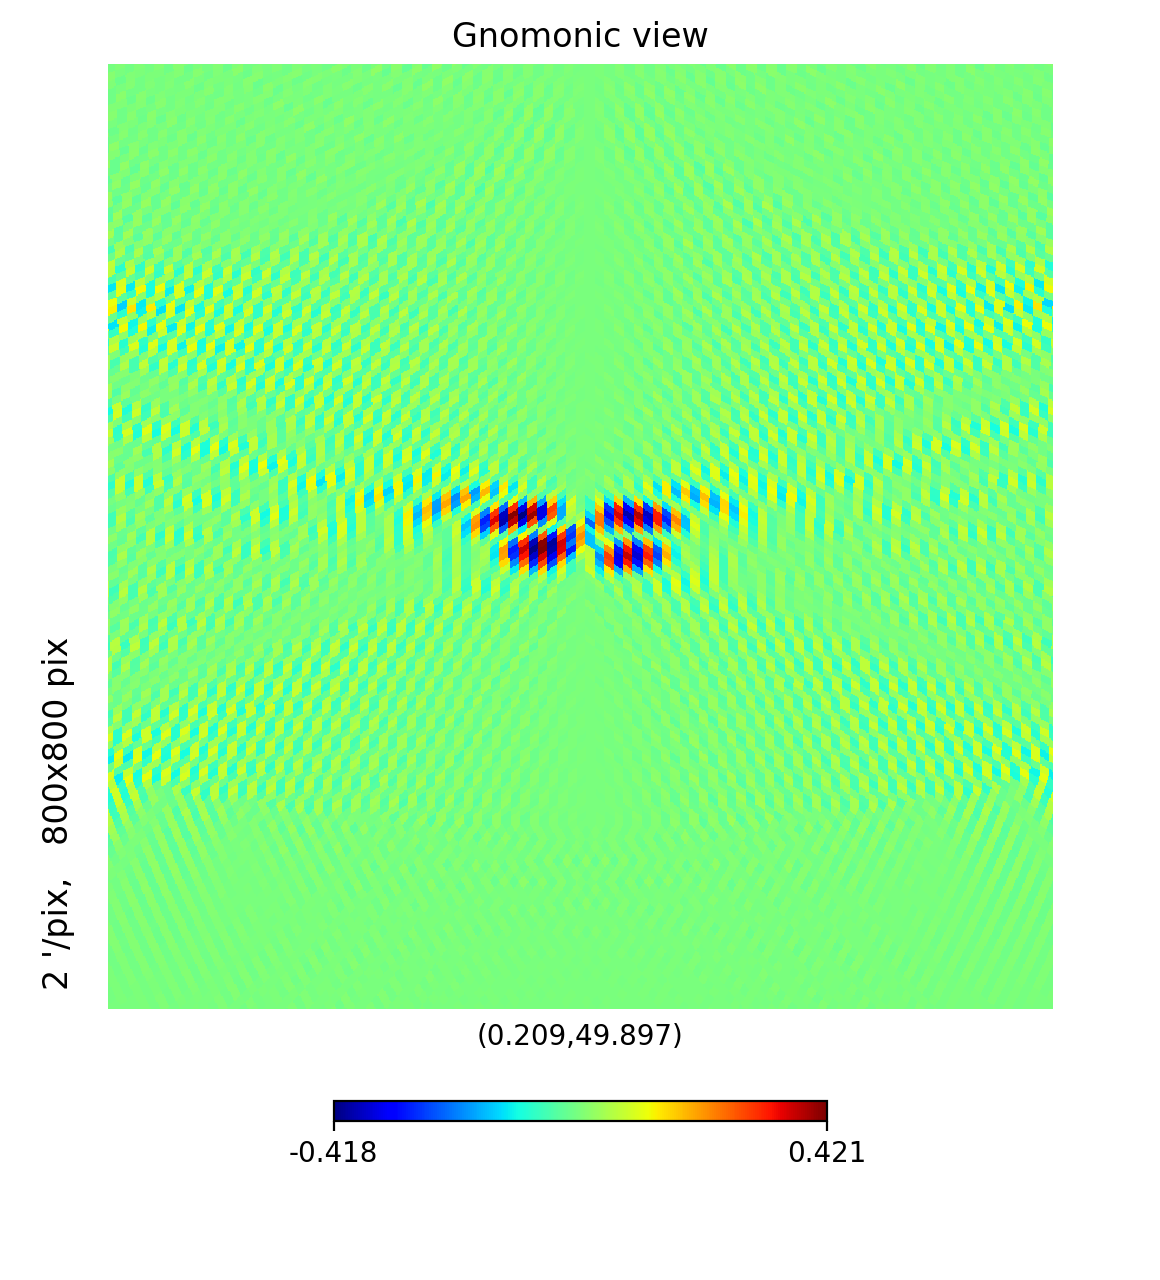

In [49]:
h.gnomview(tebq[2],rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview(mi,rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((tebq[2]+mi)*100/max(mr),rot=(phi,90-theta),xsize=800,reso=2)
h.gnomview((tebq[2]+mip)*100/max(mrp),rot=(phi,90-theta),xsize=800,reso=2)

<IPython.core.display.Javascript object>


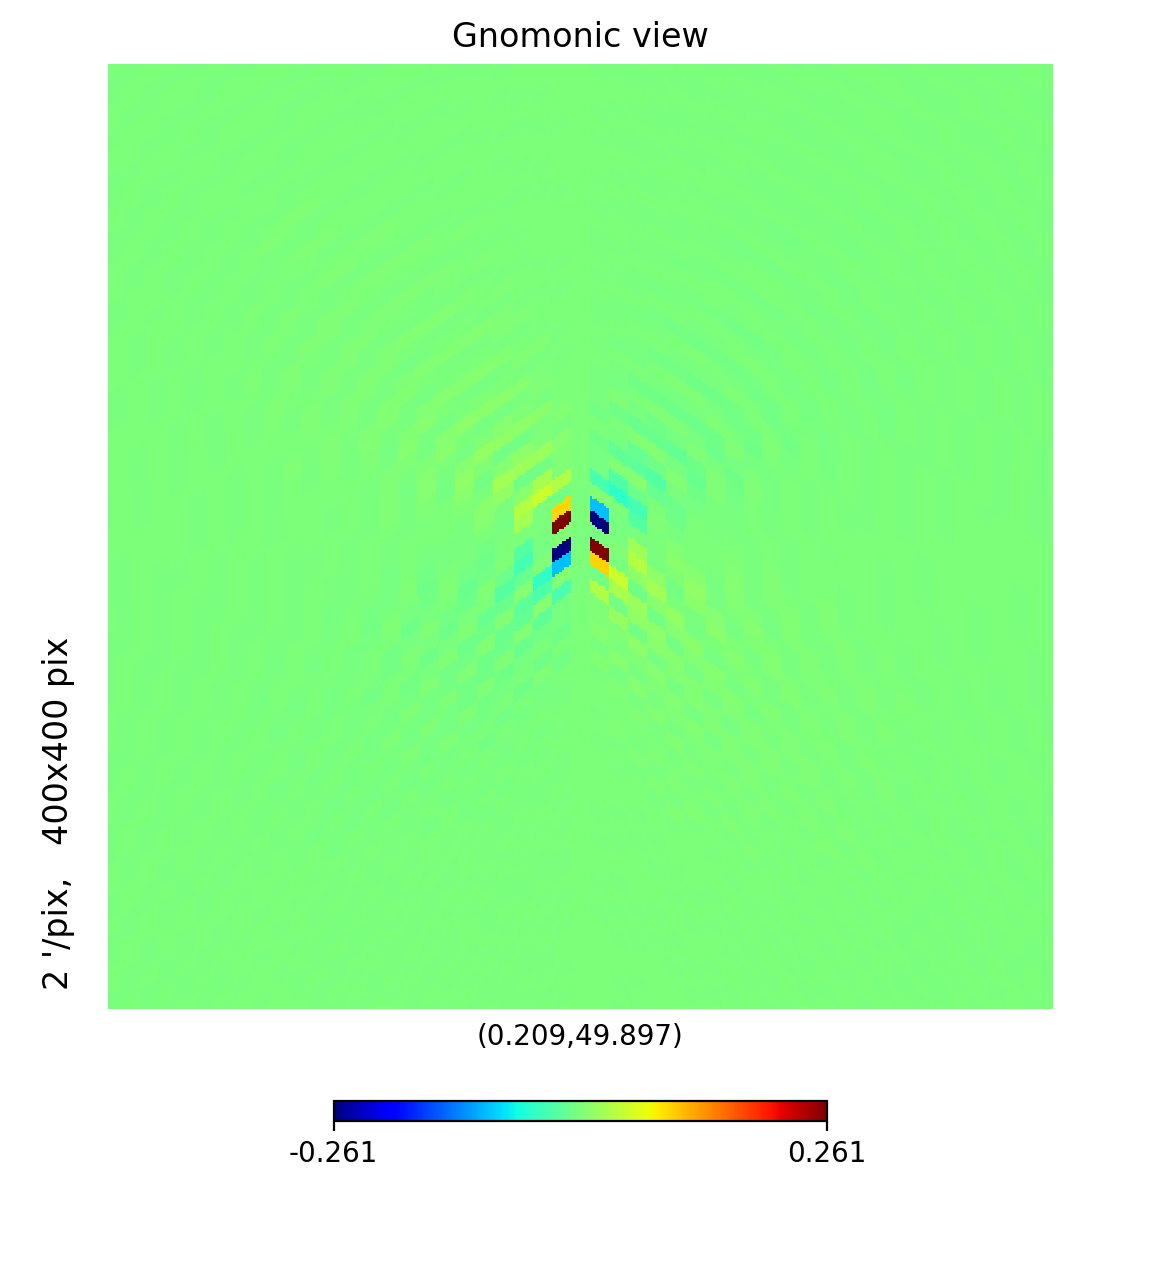

<IPython.core.display.Javascript object>


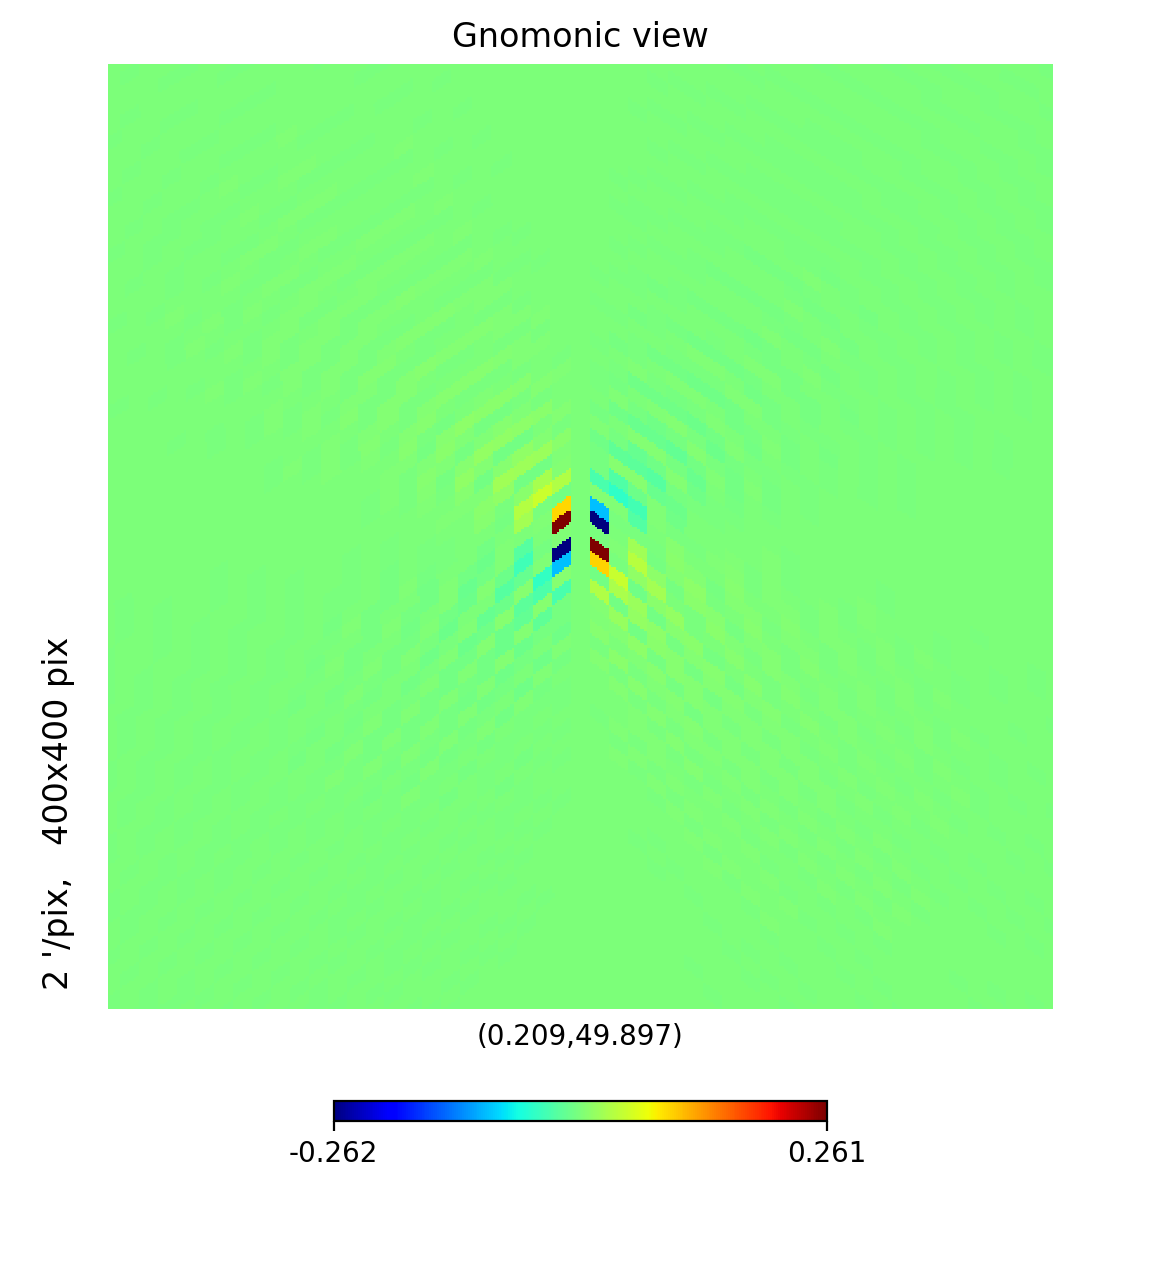

<IPython.core.display.Javascript object>


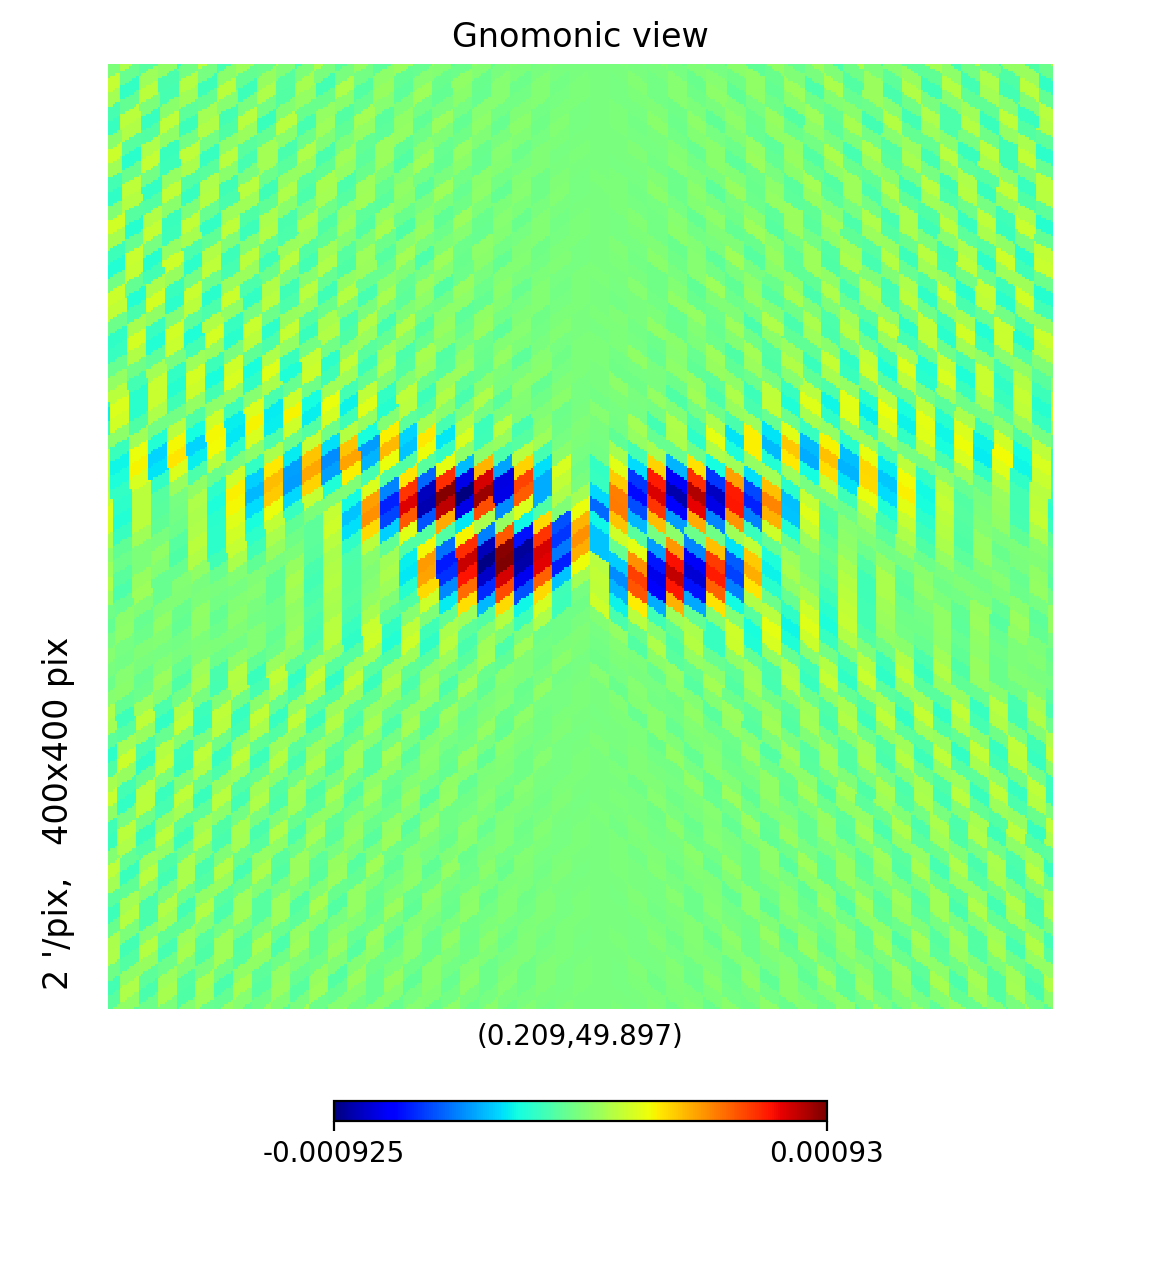

In [50]:
h.gnomview(-tebq[2],rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview(mip,rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((tebq[2]+mip),rot=(phi,90-theta),xsize=400,reso=2)

<IPython.core.display.Javascript object>


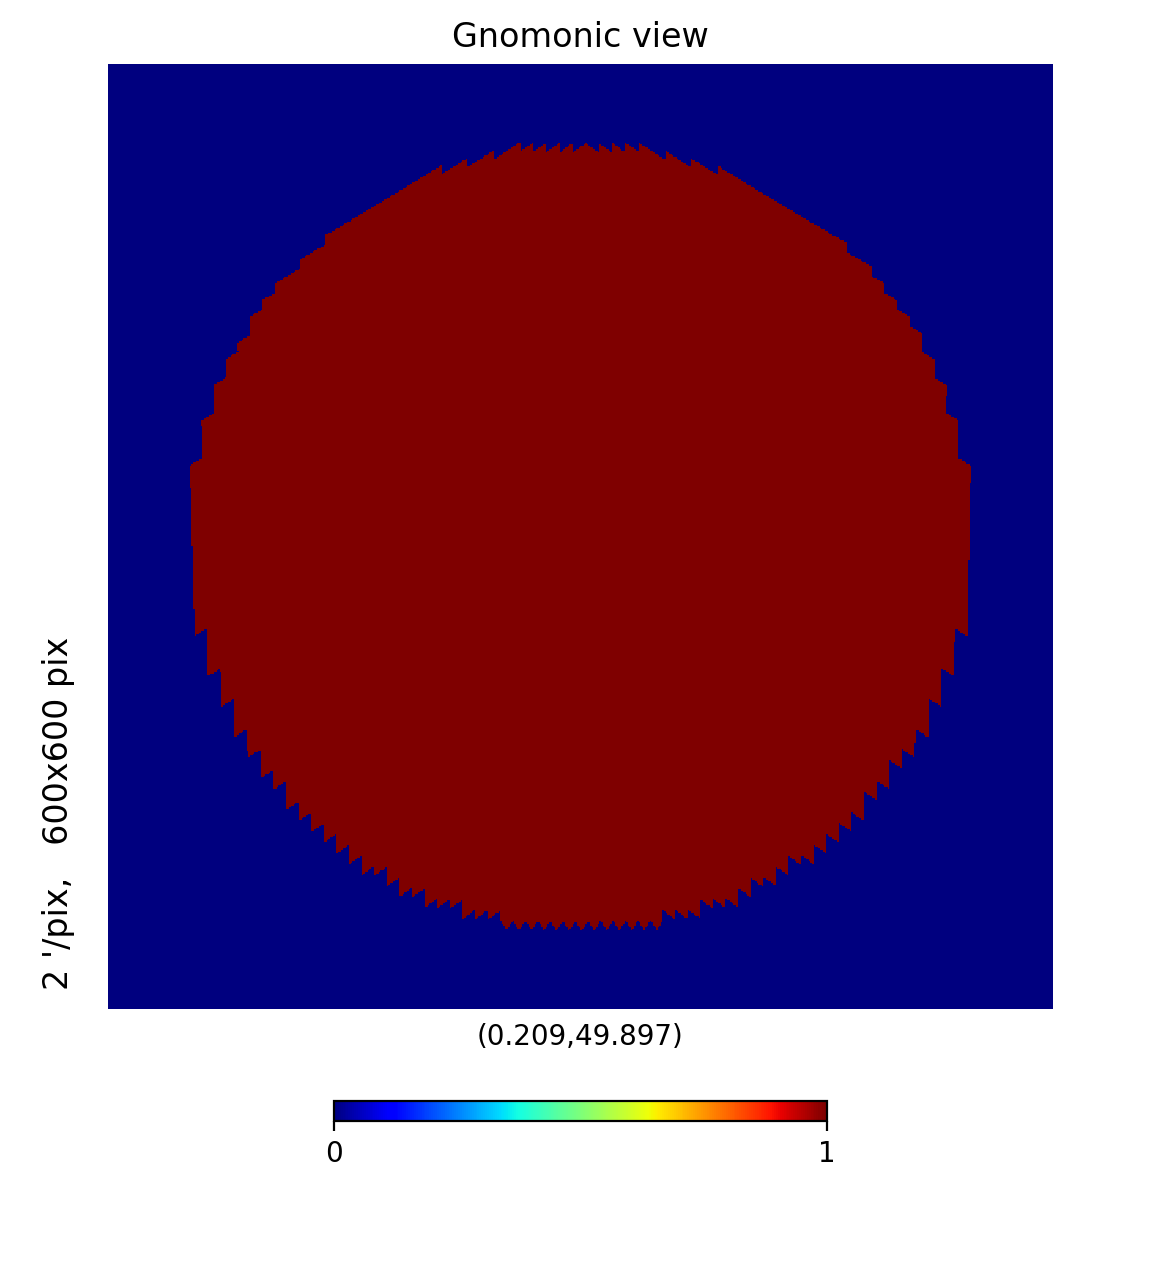

In [51]:
dmask=zeros(npix)
v=h.pix2vec(upnside,cpix)
spixel=h.query_disc(upnside,v,8.*np.pi/180.,inclusive=True,fact=1)
dmask[spixel]=1.
#dmask[cpix]=100
h.gnomview(dmask,rot=(phi,90-theta),xsize=600,reso=2)

In [52]:
tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
rteb=y.convert_qu2eb(tqu,discsize=12.,pindex=spixel)

<IPython.core.display.Javascript object>


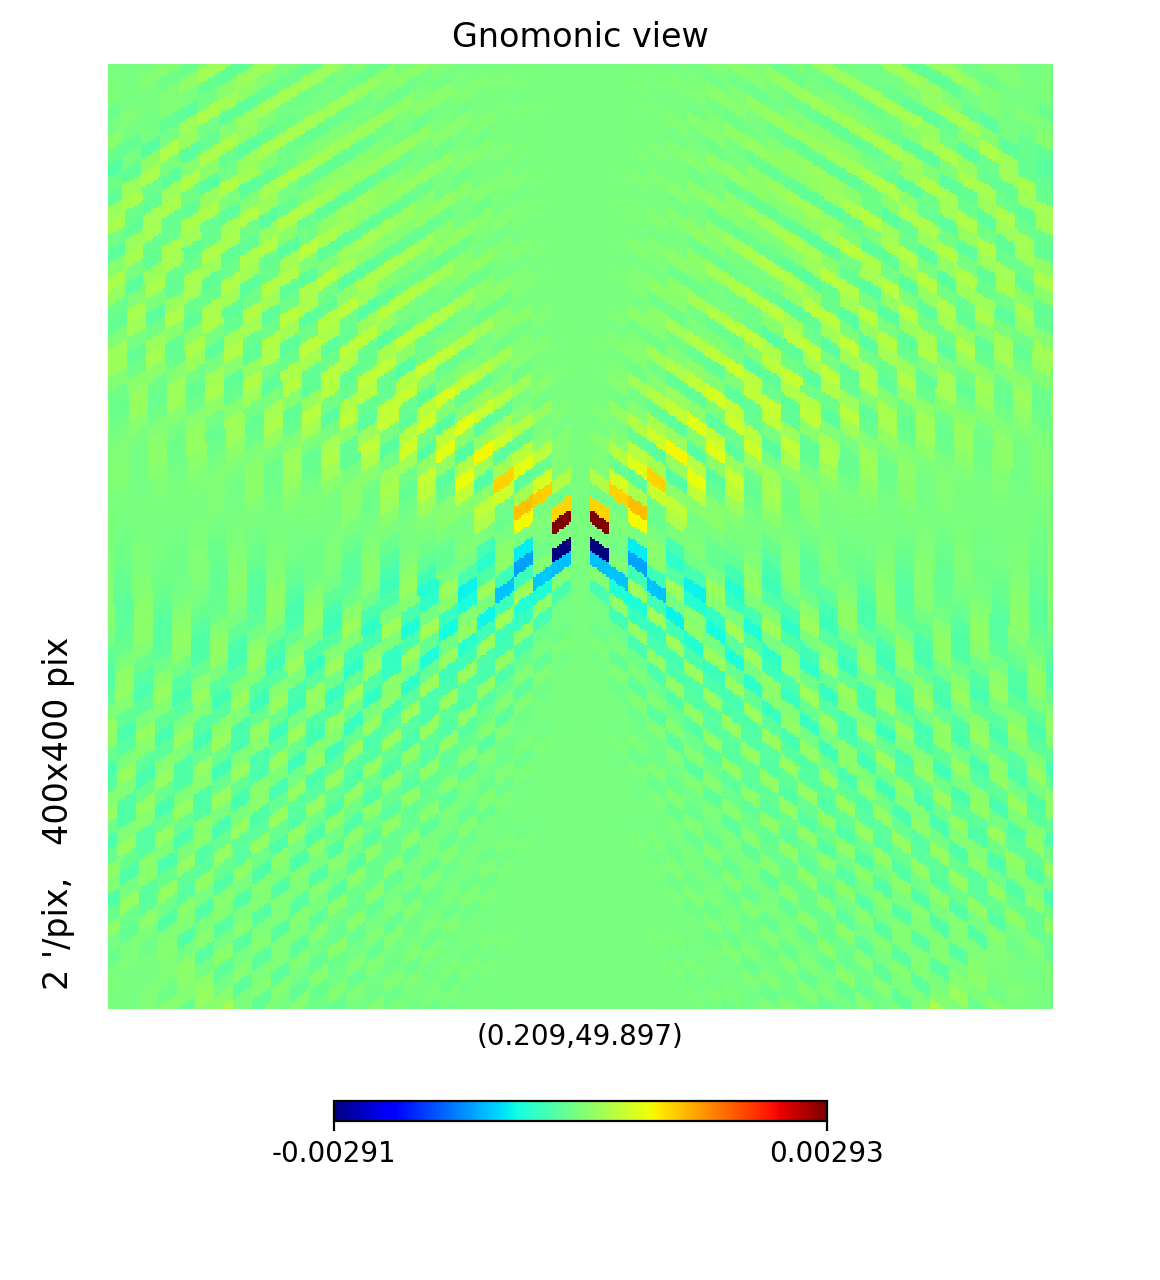

<IPython.core.display.Javascript object>


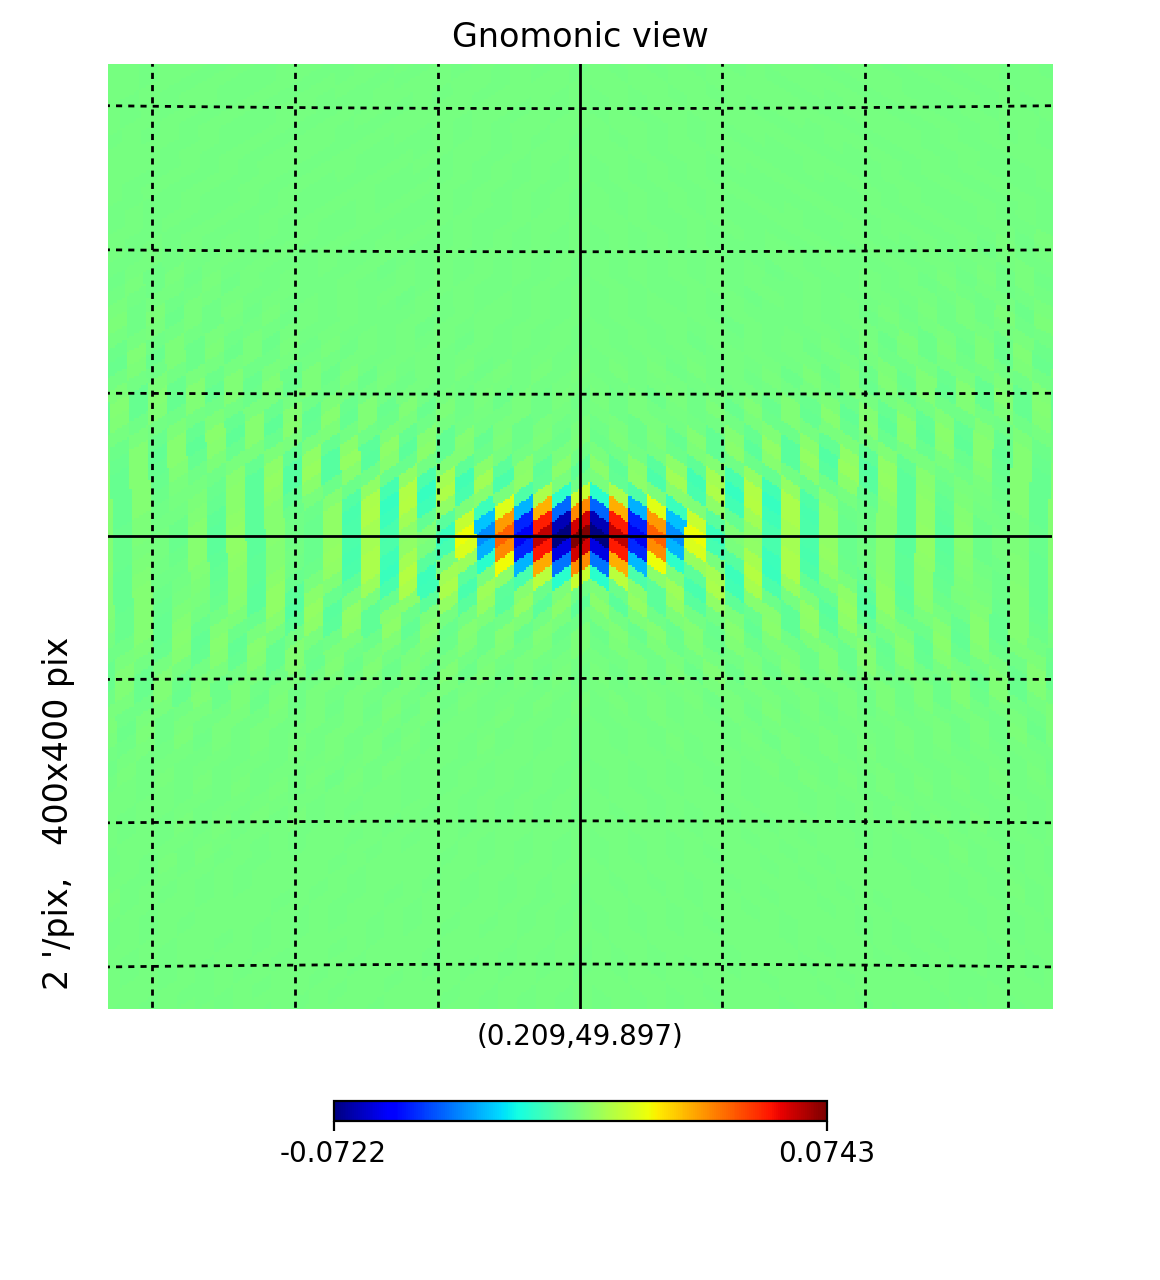

80.6785987712 99.3214012288 -9.32140122877 9.32140122877
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


<IPython.core.display.Javascript object>


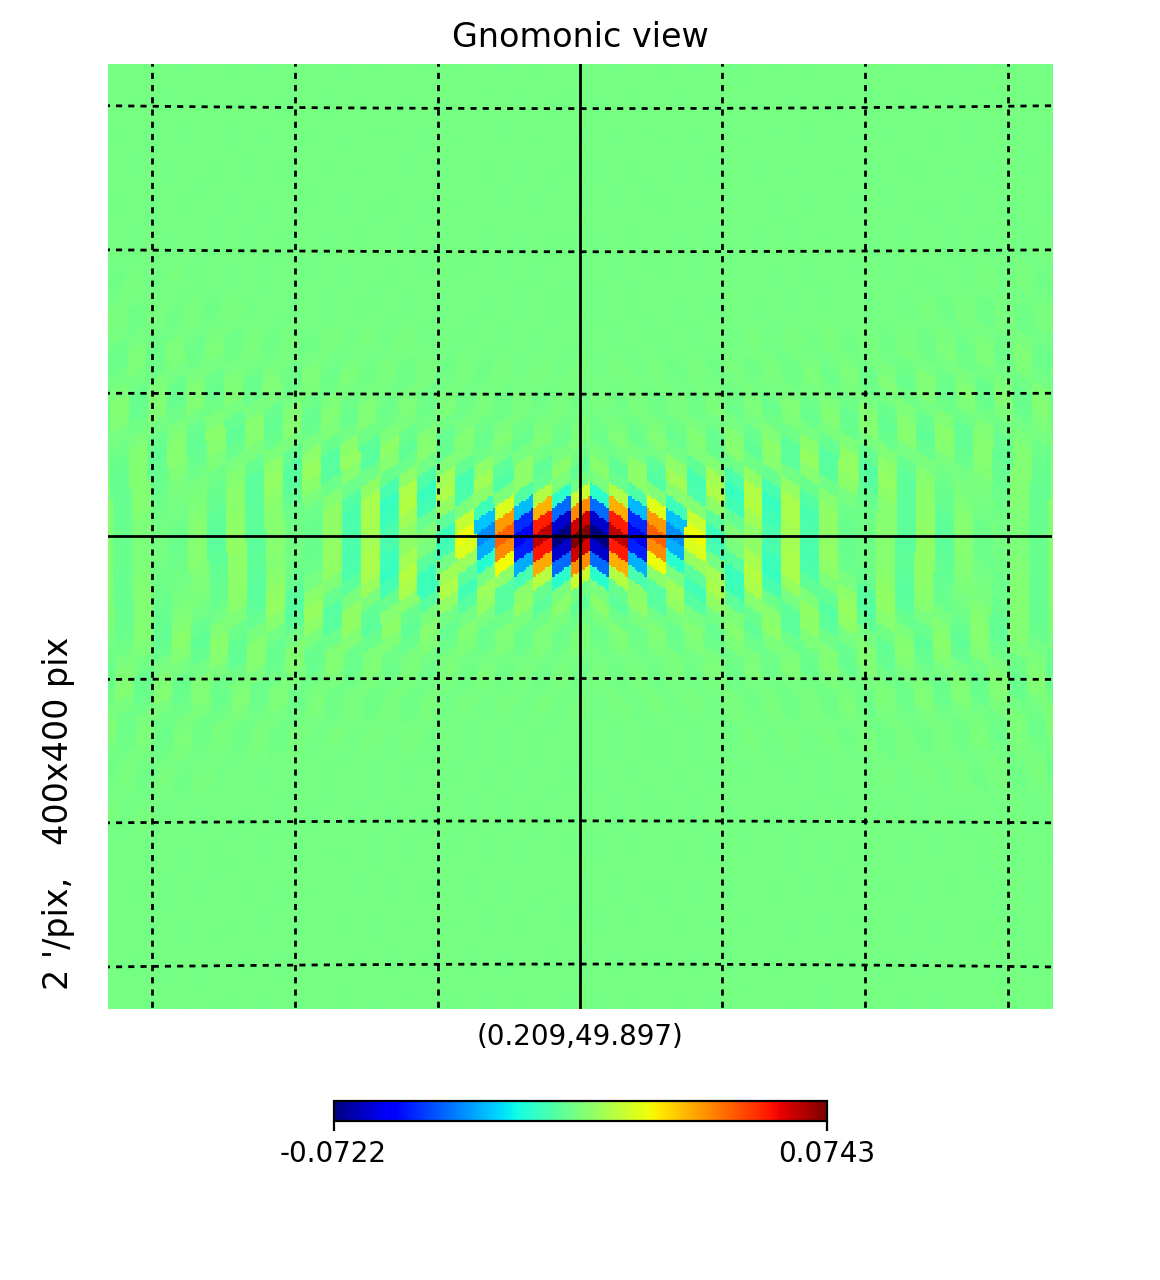

80.6785987712 99.3214012288 -9.32140122877 9.32140122877
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [55]:
h.gnomview(rteb[1]+mr,rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((tebq[1]-rteb[1]),rot=(phi,90-theta),xsize=400,reso=2) ; h.graticule(dpar=2,dmer=2)
h.gnomview((mr+tebq[1]),rot=(phi,90-theta),xsize=400,reso=2) ; h.graticule(dpar=2,dmer=2)

<IPython.core.display.Javascript object>


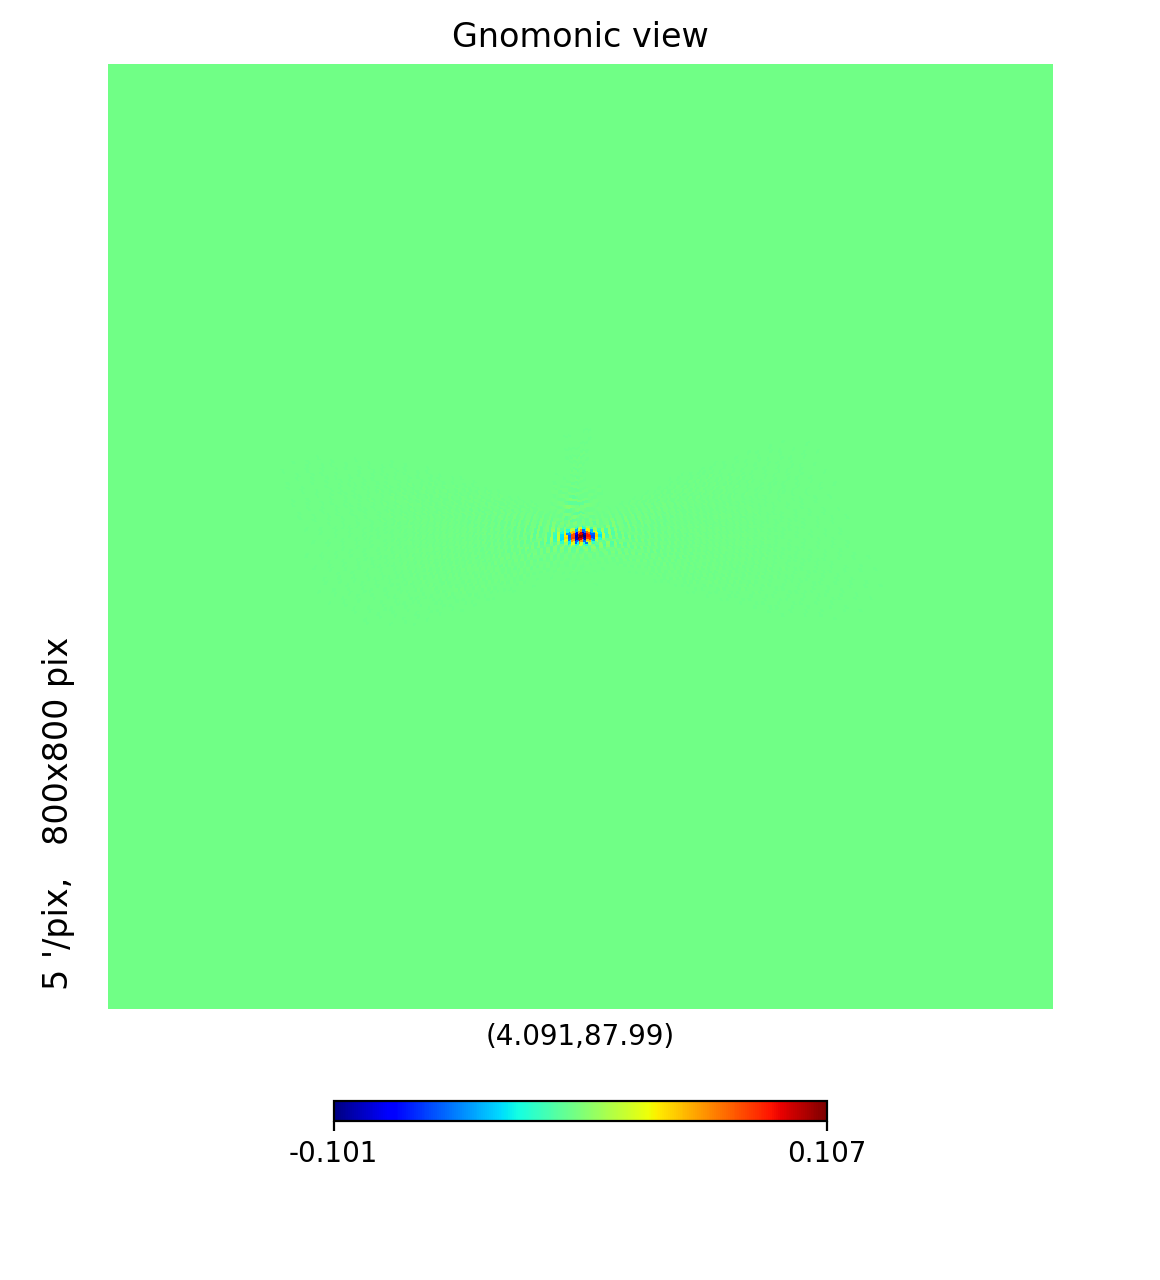

In [44]:
h.gnomview((mr+tebq[1]),rot=(phi,90-theta),xsize=800,reso=5) #; h.graticule(dpar=2,dmer=2)

<IPython.core.display.Javascript object>


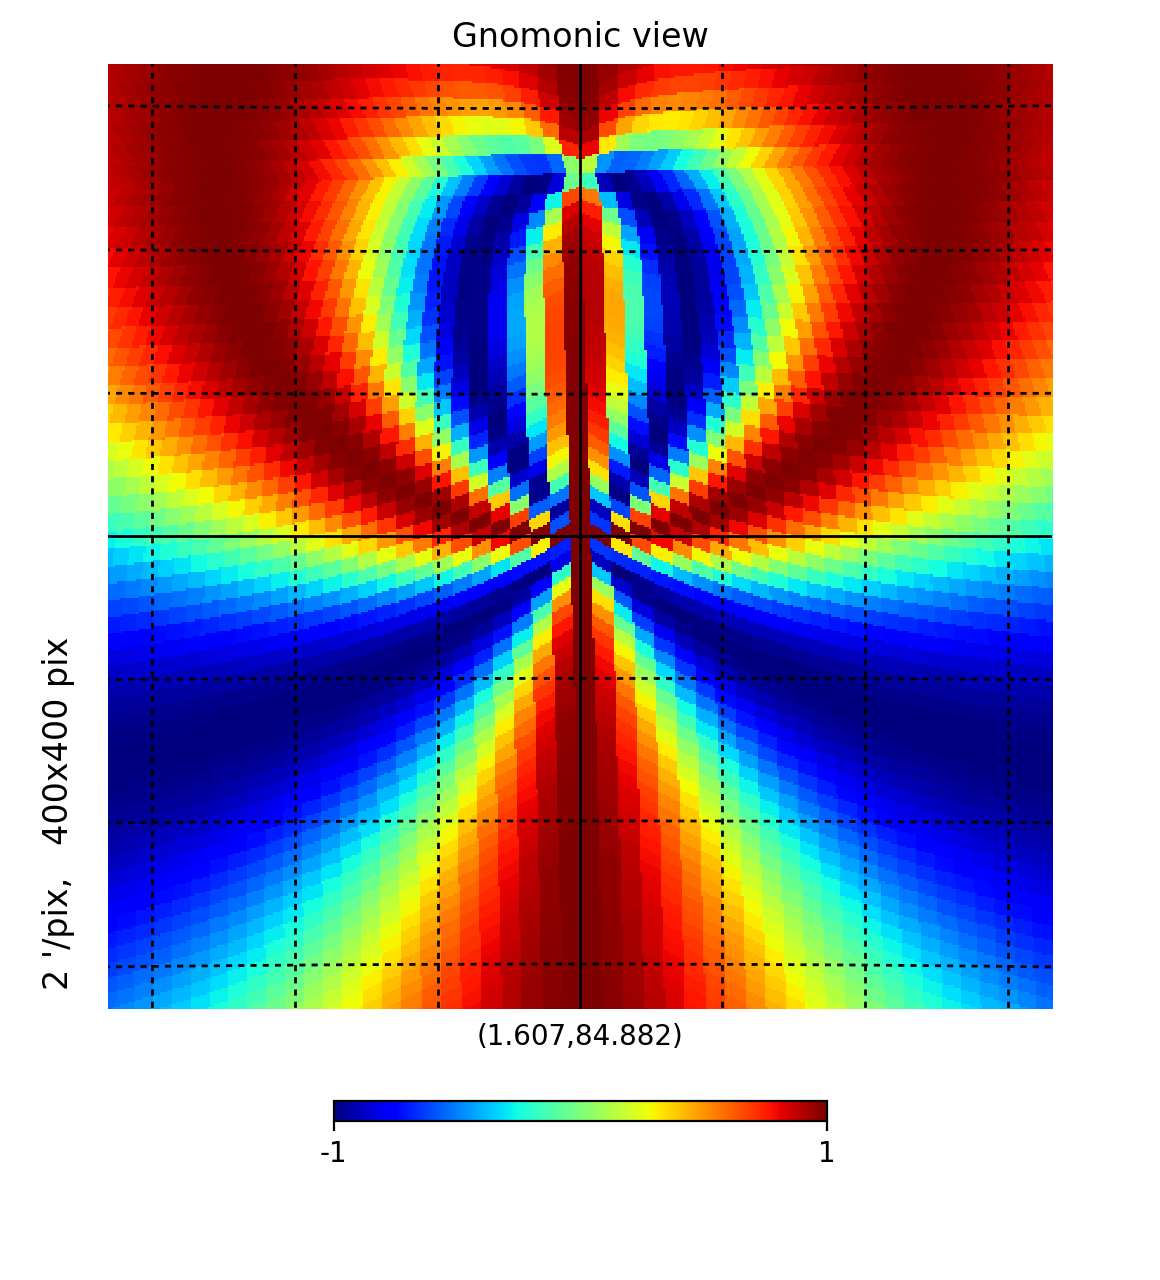

80.6785987712 99.3214012288 -9.32140122877 9.32140122877
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [22]:
h.gnomview(cos(2.*(a-g)),rot=(phi,90-theta),xsize=400,reso=2) ; h.graticule(dpar=2,dmer=2)

<IPython.core.display.Javascript object>


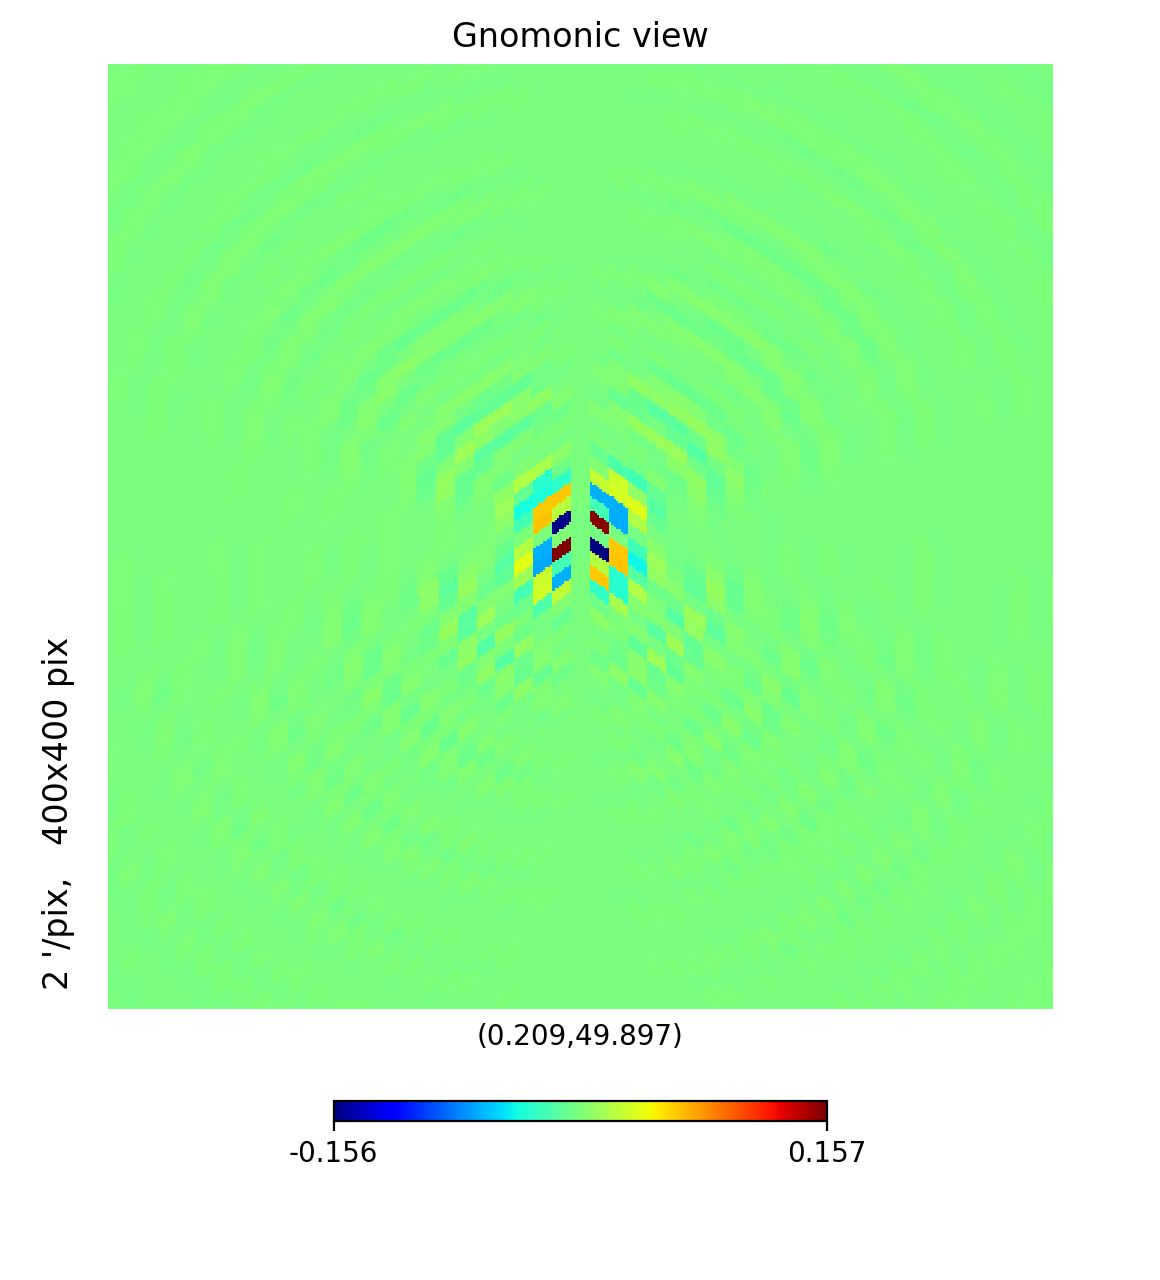

<IPython.core.display.Javascript object>


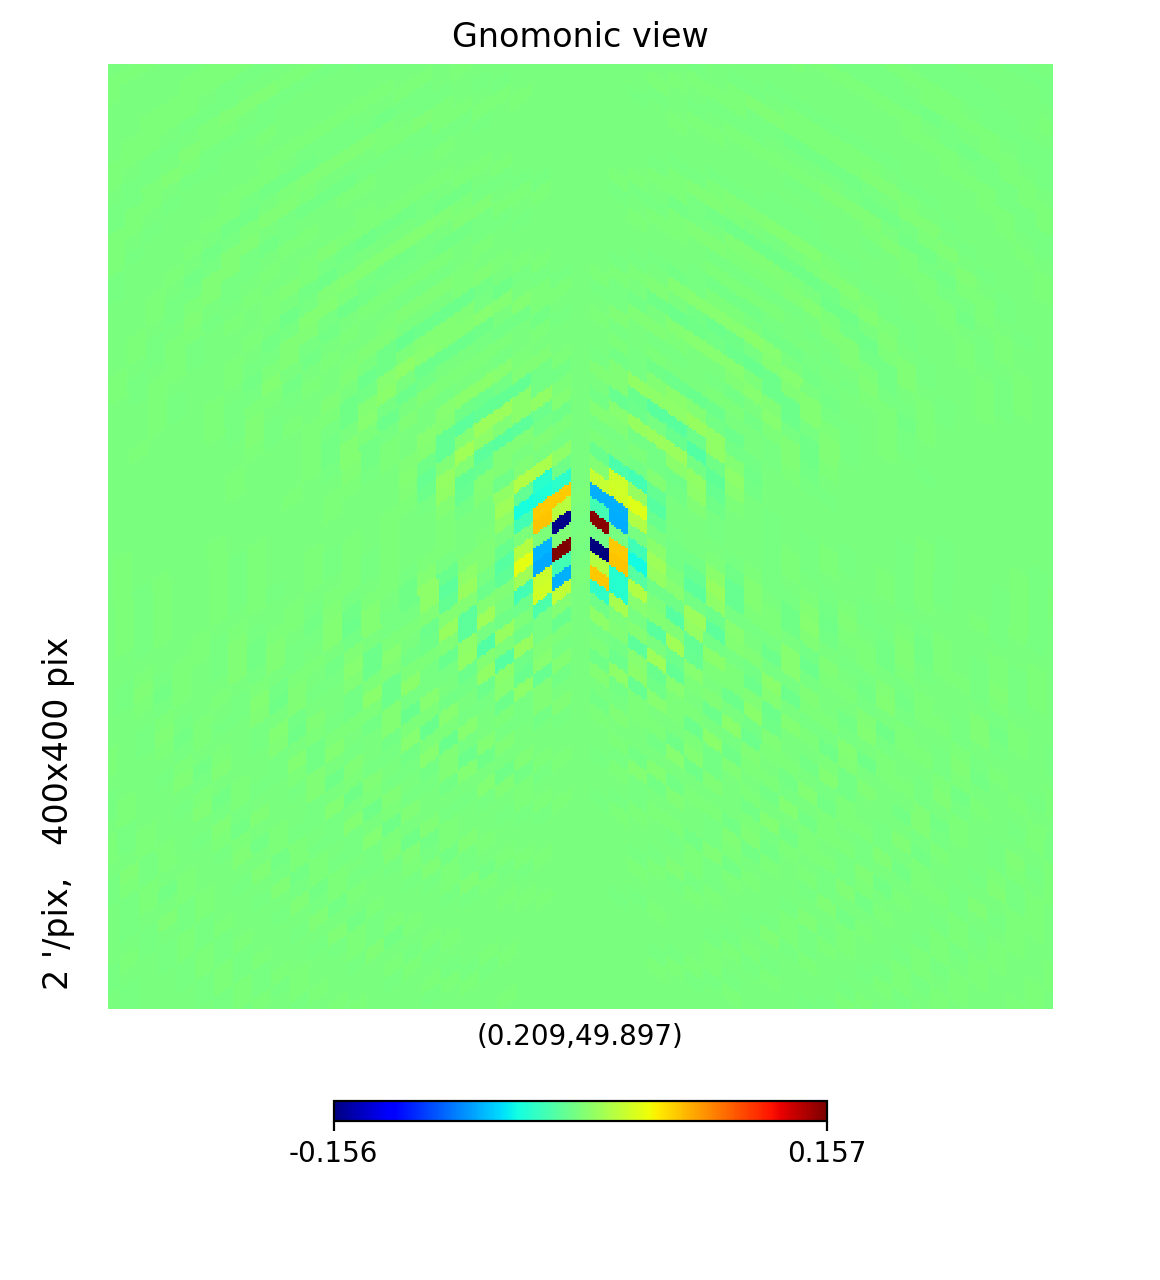

<IPython.core.display.Javascript object>


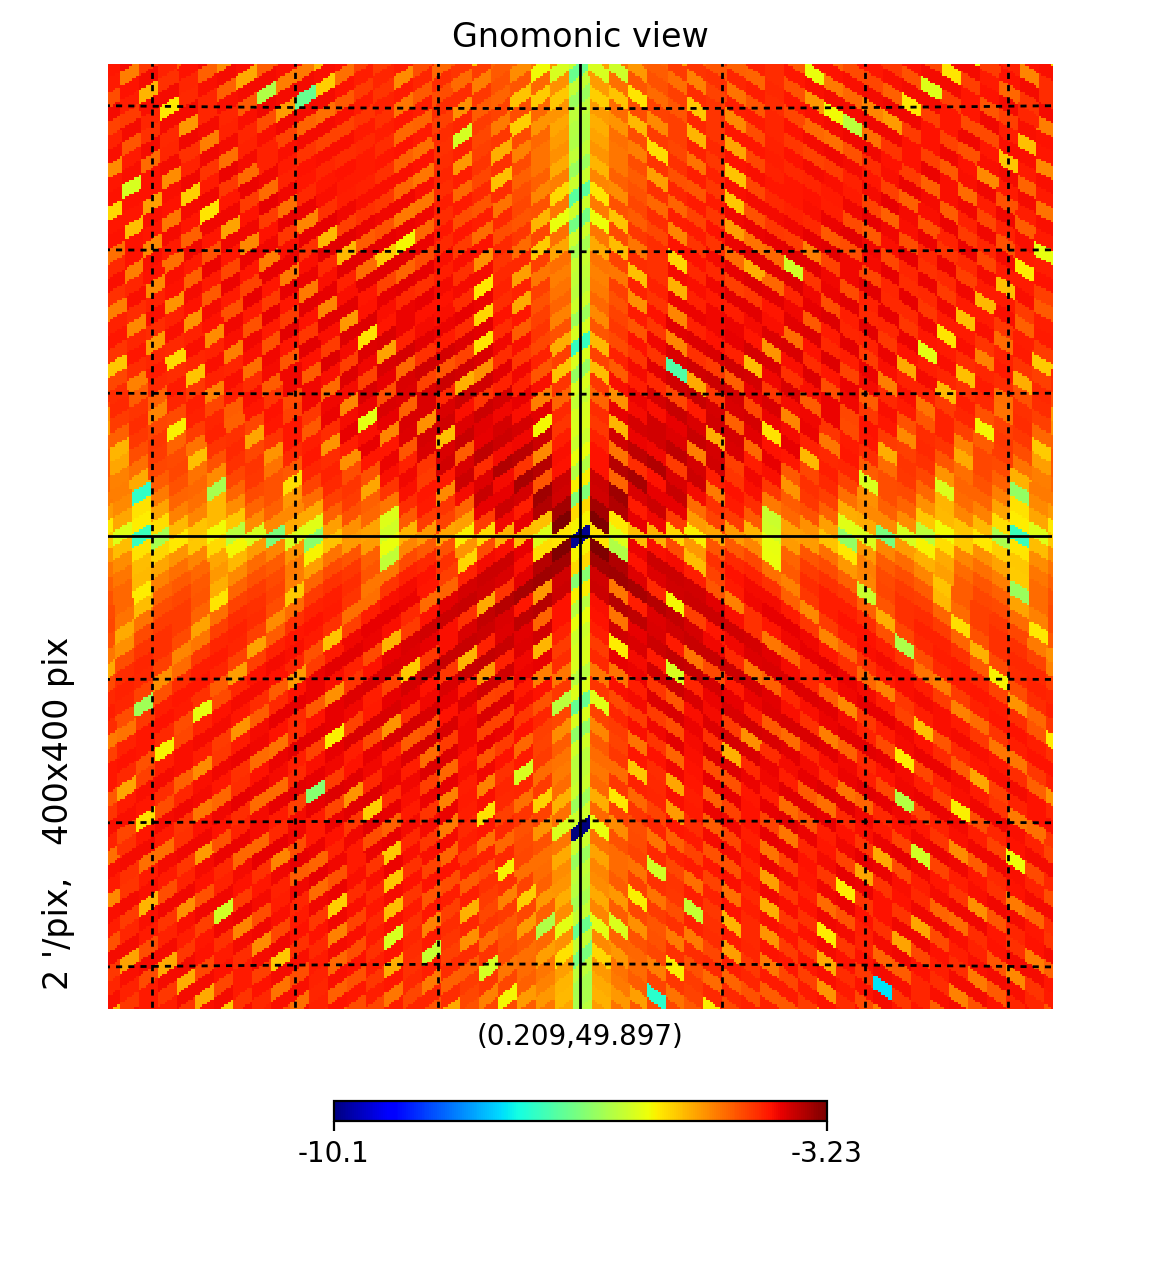

80.6785987712 99.3214012288 -9.32140122877 9.32140122877
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


In [79]:
h.gnomview(rteb[2]+mi,rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview((rteb[2]-tebq[2]),rot=(phi,90-theta),xsize=400,reso=2)
h.gnomview(log10(abs(mi+tebq[2])),rot=(phi,90-theta),xsize=400,reso=2) ; h.graticule(dpar=2,dmer=2)